# Machine Learning Projekt
<img src="img/ost-logo.png" align="right">
<b>Herbstsemester 2021</b><br>
<a href="mailto:noe.schreiber@ost.ch">Noé Schreiber</a> und <a href="mailto:alex.koller@ost.ch">Alex Koller</a>

## Inhaltsverzeichnis <a name="toc"></a>

- [1. Einleitung](#einleitung)
- [2. Zielsetzung und Vorgehensweise](#ziel)
- [3. Explorative Datenanalyse](#eda)
    - [3.1 Dimensionen des Datensatzes](#eda-dim)
    - [3.2 Vorschau der Daten](#eda-preview)
    - [3.3 Betrachtung der Datentypen](#eda-types)
    - [3.4 Statistische Merkmal der Daten](#eda-stat)
    - [3.5 Univariate Analyse des Targets](#eda-univ)
    - [3.6 Bivariate Analyse](#eda-biv)
        - [3.6.1 Betrachtung der kategorischen Variablen](#eda-bivK)
        - [3.6.2 Betrachtung der numerischen Variablen](#eda-bivN)
    - [3.7 Multivariate Analyse](#eda-mul)
    - [3.8 Data Preparation](#dataprep)
- [4. No Free Lunch](#nfl)
    - [4.1 k-Nearest-Neighbors](#knn)
    - [4.2 Logistische Regression](#logreg)
    - [4.3 Decision Tree](#dectree)
    - [4.4 Random Forests](#randfor)
    - [4.5 Boosting](#boosting)
- [5. Validierung](#val)
- [6. Entscheid](#entscheid)
- [7. Schlussfolgerung und Ausblick](#ausblick)
- [8. Referenzen](#ref)


***
***
## Einleitung <a name="einleitung"></a>

Das Team "Wetterwarte Waldau" beschäftigt sich mit der Wettervorhersage einzelner Ortschaften in Australien. Für Landwirtschaft und Ökosystem sind auf einem solch trockenen Kontinent die Regentage von besonderer Bedeutung. Das Augenmerk wird auf die Vorhersage genannter Regentage gesetzt.

***
***
## Zielsetzung und Vorgehensweise <a name="ziel"></a>

Es soll aus einem Datensatz mit Wetterdaten in Australien ein Learner implementiert werden, mit dem Wettervorhersagen gemacht werden können. Konkret geht es darum, Regentage zu bestimmen. Diese sollen aus den Merkmalen der Vortage, Luftdruck, relative Luftfeuchtigkeit, Windrichtung und -stärke, Temperatur, Verdunstung und Wolkenanteil am Himmel bestimmt werden.

***
***
## Explorative Datenanalyse <a name="eda"></a>

_Die explorative Datenanalyse wird auch als explorative Statistik bezeichnet und bildet ein Teilgebiet der Statistik. Es werden Daten analysiert, zu denen kaum oder sogar keine bekannten Zusammenhänge bestehen._

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Daten laden
df = pd.read_csv('./data/weatherAUS.csv', sep = ',');

# Einstellungen für plot
palette1 = ["wheat" for _ in range(3)]
palette1[0] = "gold"

***
### Dimensionen des Datensatzes <a name="eda-dim"></a>

In [2]:
df.shape

(145460, 23)

Wir haben 145'460 statistische Einheiten im Datensatz erfasst, welche jeweils über 23 Merkmale verfügen.
***
### Vorschau der Daten <a name="eda-preview"></a>

In [3]:
df.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


Die Merkmale haben folgende Eigenschaften:

| Variablenname | Typ | Einheit | Bemerkung |
| -------- | -------- | -------- | -------- | 
| `Date` |(Datum) | Der Tag, an dem gemessen wurde
| `Location` | (Qualitativ, nominal) | Die Stadt in der gemessen wurde | |
| `MinTemp` | (Quantitativ, stetig) | Die tiefste gemessene Temperatur | [°C] |
| `MaxTemp` | (Quantitativ, stetig) | Die höchste gemessene Temperatur | [°C] |
| `Rainfall` | (Quantitativ, stetig) | Die Niederschlagsmenge in den 24 Stunden vor 9 Uhr | [mm] |
| `Evaporation` | (Quantitativ, stetig) | [Pfannenverdunstung](https://de.wikibrief.org/wiki/Pan_evaporation) in den 24 Stunden vor 9 Uhr | [mm] |
| `Sunshine` | | Strahlender Sonnenschein in den 24 Stunden bis Mitternacht | [h] |
| `WindGustDir` | (Qualitativ, nominal) | Richtung der stärksten Böe in den 24 Stunden bis Mitternacht | [16 Himmelsrichtung] |
| `WindGustSpeed` | (Quantitativ, stetig) | Geschwindigkeit der stärksten Böe in den 24 Stunden bis Mitternacht | [km/h] |
| `WindDir9am` | (Qualitativ, nominal) | Windrichtung gemittelt über 10 Minuten vor 9 Uhr | [16 Himmelsrichtung] |
| `WindDir3pm` | (Qualitativ, nominal) | Windrichtung gemittelt über 10 Minuten vor 15 Uhr | [16 Himmelsrichtung] |
| `WindSpeed9am` | (Quantitativ, stetig) | Windgeschwindigkeit gemittelt über 10 Minuten vor 9 Uhr | [km/h] |
| `WindSpeed3pm` | (Quantitativ, stetig) | Windgeschwindigkeit gemittelt über 10 Minuten vor 15 Uhr | [km/h] |
| `Humidity9am` | (Quantitativ, stetig) | Relative Luftfeuchtigkeit gemittelt über 10 Minuten vor 9 Uhr | [%] |
| `Humidity3pm` | (Quantitativ, stetig) | Relative Luftfeuchtigkeit gemittelt über 10 Minuten vor 15 Uhr | [%] |
| `Pressure9am` | (Quantitativ, stetig) | Atmosphärischer Druck auf mittlere Meereshöhe gemittelt über 10 Minuten vor 9 Uhr | [hpa] |
| `Pressure3pm` | (Quantitativ, stetig) | Atmosphärischer Druck auf mittlere Meereshöhe gemittelt über 10 Minuten vor 15 Uhr | [hpa] |
| `Cloud9am` | (Quantitativ, nominal) | Anteil des Himmels, der um 9 Uhr von Wolken verdeckt ist | [Achtel] |
| `Cloud3pm` | (Quantitativ, nominal) | Anteil des Himmels, der um 15 Uhr von Wolken verdeckt ist | [Achtel] |
| `Temp9am` | (Quantitativ, stetig) | Temperatur um 9 Uhr | [°C] |
| `Temp3pm` | (Quantitativ, stetig) | Temperatur um 15 Uhr | [°C] |
| `RainToday` | (Qualitativ, nominal) | Indikatorvariable, ob es an diesem Tag geregnet hat | [Yes/No] |
| `RainTomorrow` | (Qualitativ, nominal) | Indikatorvariable, ob es am nächsten Tag geregnet hat | [Yes/No] |

***
### Betrachtung der Zusammenfassung <a name="eda-types"></a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Bei der Zusammenfassung fällt auf, dass wir mit einigen qualitativen Merkmalen arbeiten müssen. Ebenfalls scheinen wir einige `Null` Werte und fehlende Einträge zu haben. Um diese kümmern wir uns im Data Preparation.
***
### Statistische Merkmale der Daten <a name="eda-stat"></a>

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


Aus der obigen Tabelle geht hervor, dass es Aussreisser bei `Rainfall`, `Evaporation`, `WindSpeed9am` und `Windspeed3pm`geben kann. Dies erkennt man aus der Differenz zwischen dem max-Wert und den 75%-Quantil. Um dies zu überprüfen stellen wir die auffälligen Merkmale, Kapitel [Betrachtung der numerischen Variablen](#eda-bivN), als Histogramm dar.

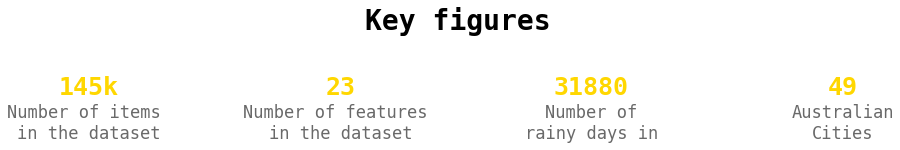

In [6]:
fig=plt.figure(figsize=(6,2),facecolor='white')

ax0=fig.add_subplot(1,1,1)
ax0.text(1.1,1,"Key figures",color='black',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')

ax0.text(0,0.4,"145k",color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0,0.001,"Number of items \nin the dataset",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(0.75,0.4,"23",color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0.75,0.001,"Number of features \nin the dataset",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(1.5,0.4,"31880",color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(1.5,0.001,"Number of\nrainy days in",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(2.25,0.4,"49",color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(2.25,0.001,"Australian\nCities",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.set_yticklabels('')
ax0.tick_params(axis='y',length=0)
ax0.tick_params(axis='x',length=0)
ax0.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax0.spines[direction].set_visible(False)

In 49 australischen Städten wurden 145'460 Messungen mit 23 unterschiedlichen Merkmalen aufgenommen. Im Datensatz befinden sich 31'880 Regentage.


***
### Univariate Analyse des Targets <a name="eda-univ"></a>

In [7]:
dfTarget = df['RainTomorrow']
dfTarget.isnull().sum()

3267

In [8]:
dfTarget.unique()
dfTarget.value_counts()/len(dfTarget)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

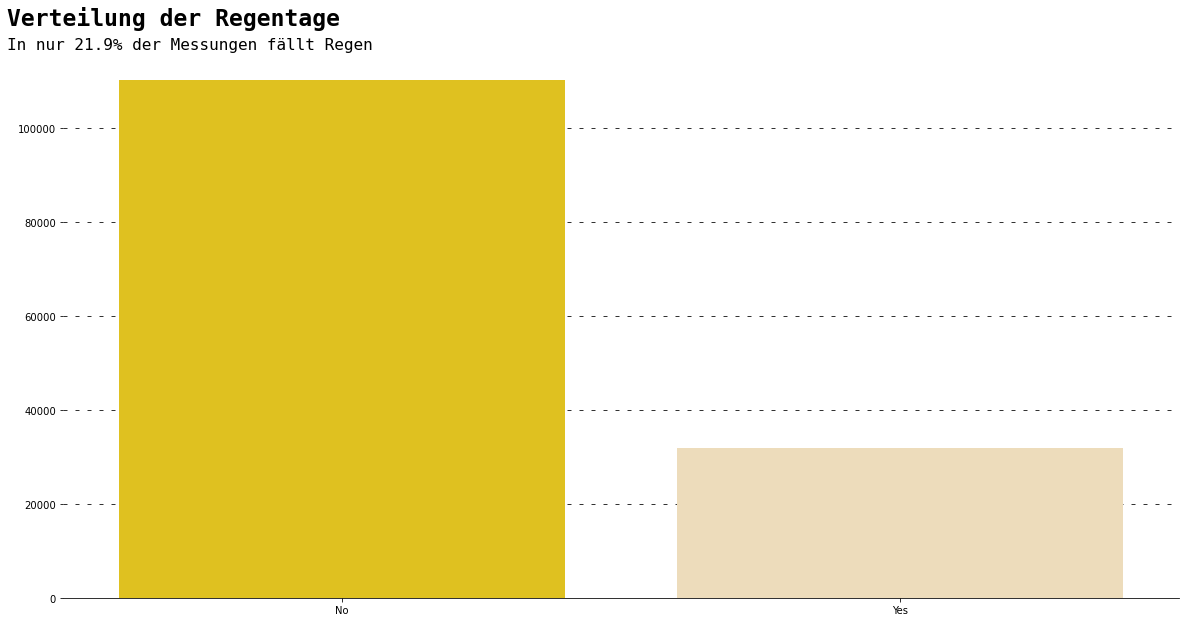

In [9]:
fig=plt.figure(figsize=(20,10),facecolor='white')

gs=fig.add_gridspec(1,1)

ax=[None for _ in range(2)]

ax[0]=fig.add_subplot(gs[0,0])

ax[0].text(-0.6,122000,"Verteilung der Regentage",fontsize=23,fontweight='bold', fontfamily='monospace')
ax[0].text(-0.6,117000,"In nur 21.9% der Messungen fällt Regen",fontsize=16,fontweight='light', fontfamily='monospace')

sns.countplot(data=df,x='RainTomorrow',ax=ax[0],order=['No','Yes'],palette=palette1,zorder=2)

for i in range(1):
    ax[i].grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(5,10))
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)


plt.show()

Obenstehendes Diagramm visualisiert alle 145'460 Einträge, von denen bei 31'880 Einträgen Regen festgestellt wurde.

***
### Bivariate Analyse  <a name="eda-biv"></a>

Im Folgenden soll das Zusammenspiel zweier Merkmale analysiert und grafisch dargestellt werden. Konkret wird Niederschlag und Luftfeichtigkeit, sowie Windgeschwindigkeit zu verschiedenen Zeiten verglichen.

#### Betrachtung der kategorischen Variablen <a name="eda-bivK"></a>

In [10]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('Es sind {} quantitative Merkmale im Datensatz vorhanden\n'.format(len(categorical)))

print('Die quantitativen Merkmale sind:', categorical)

Es sind 7 quantitative Merkmale im Datensatz vorhanden

Die quantitativen Merkmale sind: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [11]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


Erkenntnisse der quantitativen Merkmale
- Der Zeitstempel ist vorhanden, jedoch nur als `String`
- Wir können das Modell an verschiedenen Ortschaften testen

#### Betrachtung der numerischen Variablen  <a name="eda-bivN"></a>

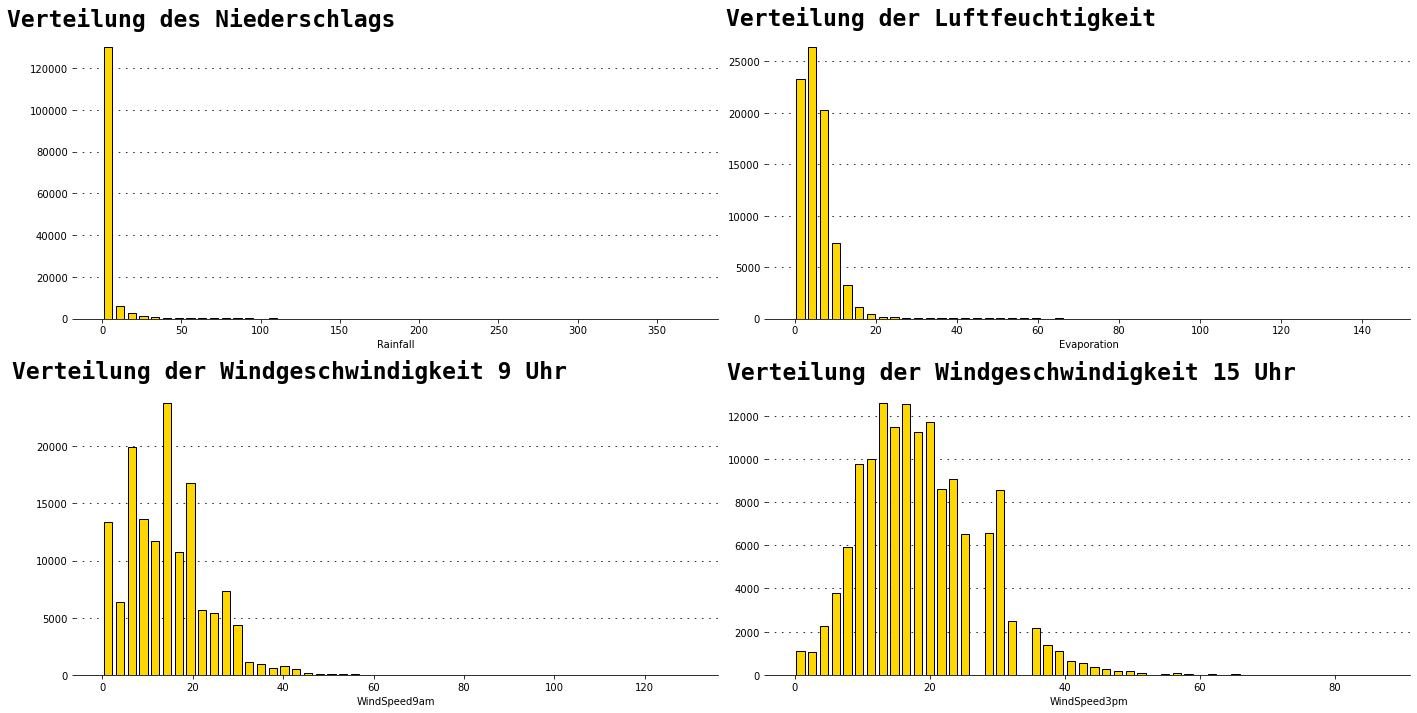

In [12]:
fig=plt.figure(figsize=(20,10),facecolor='white')
gs=fig.add_gridspec(2,2)
ax=[None for i in range(4)]

# Rainfall
ax[0]=fig.add_subplot(gs[0,0])
ax[0].text(-60, 140000,'Verteilung des Niederschlags',fontsize=23,fontweight='bold', fontfamily='monospace')
sns.histplot(x=df['Rainfall'], ax=ax[0], color='gold', alpha=1,zorder=2,linewidth=1,edgecolor='black',shrink=0.7, bins=50)
# Evaporation
ax[1]=fig.add_subplot(gs[0,1])
ax[1].text(-17, 28500,'Verteilung der Luftfeuchtigkeit',fontsize=23,fontweight='bold', fontfamily='monospace')
sns.histplot(x=df['Evaporation'], ax=ax[1], color='gold', alpha=1,zorder=2,linewidth=1,edgecolor='black',shrink=0.7, bins=50)
# Windspeed (9AM)
ax[2]=fig.add_subplot(gs[1,0])
ax[2].text(-20, 26000,'Verteilung der Windgeschwindigkeit 9 Uhr',fontsize=23,fontweight='bold', fontfamily='monospace')
sns.histplot(x=df['WindSpeed9am'], ax=ax[2], color='gold', alpha=1,zorder=2,linewidth=1,edgecolor='black',shrink=0.7, bins=50)
# Windspeed (3PM)
ax[3]=fig.add_subplot(gs[1,1])
ax[3].text(-10, 13700,'Verteilung der Windgeschwindigkeit 15 Uhr',fontsize=23,fontweight='bold', fontfamily='monospace')
sns.histplot(x=df['WindSpeed3pm'], ax=ax[3], color='gold', alpha=1,zorder=2,linewidth=1,edgecolor='black',shrink=0.7, bins=50)

for i in range(4):
    ax[i].set_ylabel('')
    ax[i].grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)
        
plt.tight_layout()

Alle vier Merkmale sind stark Rechtsschief. Mit einem Boxplot können wir nun erkennen, um wieviele Ausreisser es sich handelt.

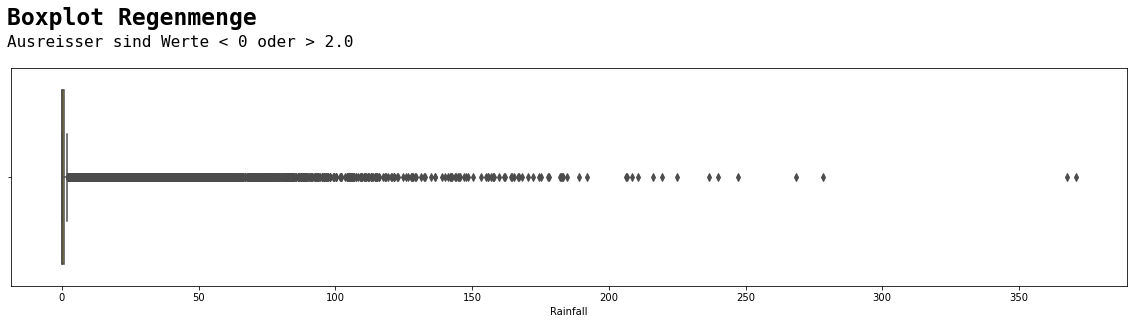

In [13]:
# Ausreisser in 'Rainfall' finden
# Python hätte mit Sicherheit eine Methode hierfür...
# |--------[===|===]--------|
# ^ loVal  ¦       ¦        ^ hiVal
#          ¦.......¦ -> IQR
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
loVal = df.Rainfall.quantile(0.25) - (IQR * 1.5)
loVal = loVal if (loVal > 0) else 0 # Regenmenge kann nicht negativ sein
hiVal = df.Rainfall.quantile(0.75) + (IQR * 1.5)

fig=plt.figure(figsize=(20,4),facecolor='white')
gs=fig.add_gridspec(1,1)

ax[0]=fig.add_subplot(gs[0,0])
ax[0].text(-20,-0.7, "Boxplot Regenmenge",fontsize=23,fontweight='bold', fontfamily='monospace')
ax[0].text(-20,-0.6, "Ausreisser sind Werte < "+str(loVal)+" oder > " + str(hiVal),fontsize=16,fontweight='light', fontfamily='monospace')
sns.boxplot(x = 'Rainfall', data = df, palette = palette1);

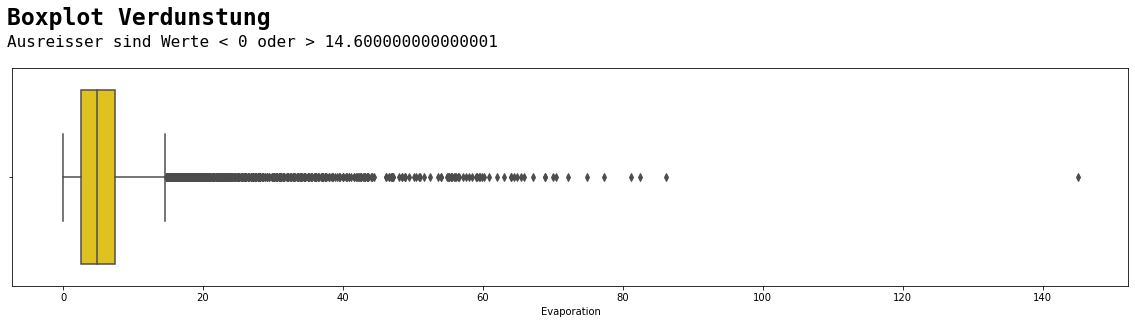

In [14]:
# Ausreisser in 'Evaporation' finden
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
loVal = df.Evaporation.quantile(0.25) - (IQR * 1.5)
loVal = loVal if (loVal > 0) else 0 # Evaporation kann nicht negativ sein
hiVal = df.Evaporation.quantile(0.75) + (IQR * 1.5)

fig=plt.figure(figsize=(20,4),facecolor='white')
gs=fig.add_gridspec(1,1)


ax[0]=fig.add_subplot(gs[0,0])
ax[0].text(-8,-0.7, "Boxplot Verdunstung",fontsize=23,fontweight='bold', fontfamily='monospace')
ax[0].text(-8,-0.6, "Ausreisser sind Werte < "+str(loVal)+" oder > " + str(hiVal),fontsize=16,fontweight='light', fontfamily='monospace')
sns.boxplot(x = 'Evaporation', data = df, palette = palette1);

Sowie bei Regenmenge, als auch bei Verdunstung besteht der Boxplot vor allem aus Ausreissern. Das war zu erwarten, da es sich nur bei einem kleinen Teil der Tage um Regentage handelt. Bei der Verdunstung ist bereits ein aussagekräftigerer Boxplot zu sehen, da hier nicht nur Regenfall, sondern auch allgemeine Luftfeuchtigkeit (die als Morgentau wieder verdunsten kann) eine Rolle spielt.

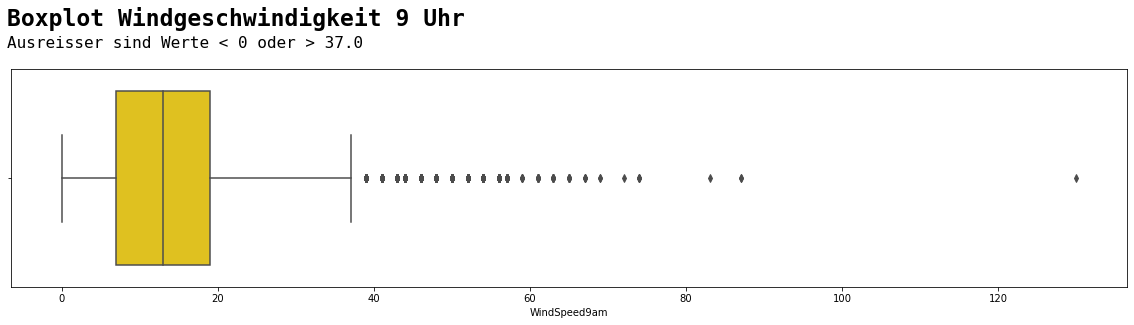

In [15]:
# Ausreisser in 'WindSpeed9am' finden
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
loVal = df.WindSpeed9am.quantile(0.25) - (IQR * 1.5)
loVal = loVal if (loVal > 0) else 0 # Windgeschwindigkeit kann nicht negativ sein (Betrag)
hiVal = df.WindSpeed9am.quantile(0.75) + (IQR * 1.5)

fig=plt.figure(figsize=(20,4),facecolor='white')
gs=fig.add_gridspec(1,1)

ax[0]=fig.add_subplot(gs[0,0])
ax[0].text(-7,-0.7, "Boxplot Windgeschwindigkeit 9 Uhr",fontsize=23,fontweight='bold', fontfamily='monospace')
ax[0].text(-7,-0.6, "Ausreisser sind Werte < "+str(loVal)+" oder > " + str(hiVal),fontsize=16,fontweight='light', fontfamily='monospace')
sns.boxplot(x = 'WindSpeed9am', data = df, palette = palette1);

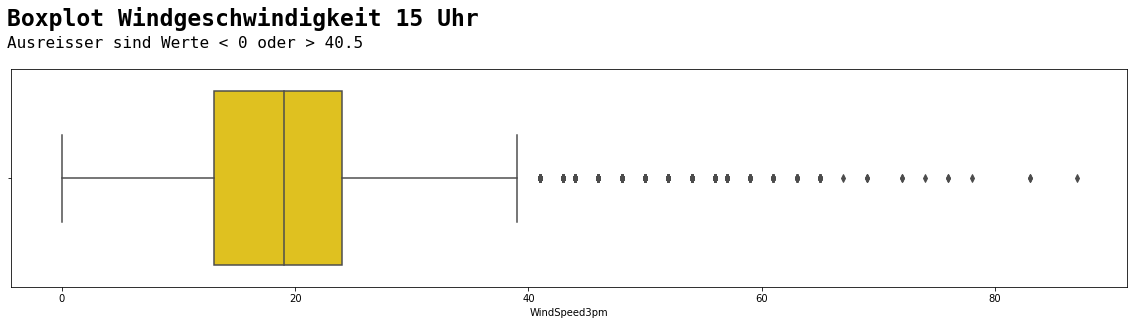

In [16]:
# Ausreisser in 'WindSpeed3pm' finden
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
loVal = df.WindSpeed3pm.quantile(0.25) - (IQR * 1.5)
loVal = loVal if (loVal > 0) else 0 # Windgeschwindigkeit kann nicht negativ sein (Betrag)
hiVal = df.WindSpeed3pm.quantile(0.75) + (IQR * 1.5)

fig=plt.figure(figsize=(20,4),facecolor='white')
gs=fig.add_gridspec(1,1)

ax[0]=fig.add_subplot(gs[0,0])
ax[0].text(-4.7,-0.7, "Boxplot Windgeschwindigkeit 15 Uhr",fontsize=23,fontweight='bold', fontfamily='monospace')
ax[0].text(-4.7,-0.6, "Ausreisser sind Werte < "+str(loVal)+" oder > " + str(hiVal),fontsize=16,fontweight='light', fontfamily='monospace')
sns.boxplot(x = 'WindSpeed3pm', data = df, palette = palette1);

Die Anzahl der Ausreisser ist sehr hoch, darum werden wir uns im Data Preparation kümmern müssen.

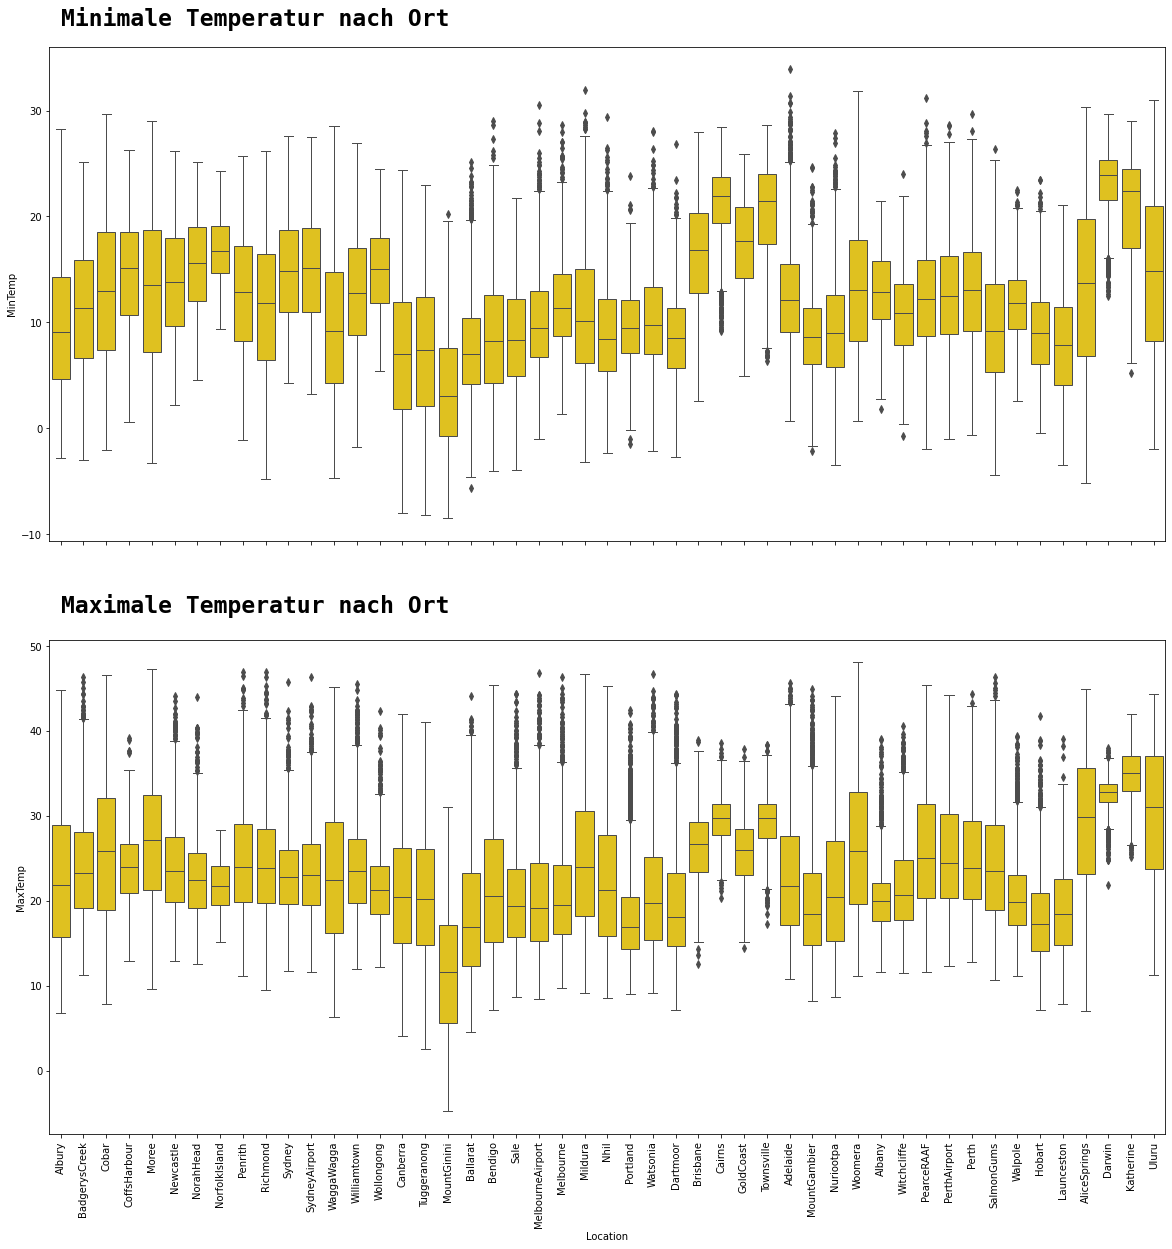

In [17]:
fig=plt.figure(figsize=(20,20),facecolor='white')
gs=fig.add_gridspec(2,1)
ax=[None for i in range(2)]

# MinTemp
ax[0]=fig.add_subplot(gs[0,0]);
ax[0].text(0, 38,'Minimale Temperatur nach Ort',fontsize=23,fontweight='bold', fontfamily='monospace')
g = sns.boxplot(data=df, x='Location', y='MinTemp', ax=ax[0], color='gold', linewidth=1)
g.set(xticklabels=[])
g.set(xlabel=None)
# MaxTemp
ax[0]=fig.add_subplot(gs[1,0]);
ax[0].text(0, 54,'Maximale Temperatur nach Ort',fontsize=23,fontweight='bold', fontfamily='monospace')
g = sns.boxplot(data=df, x='Location', y='MaxTemp', ax=ax[0], color='gold', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

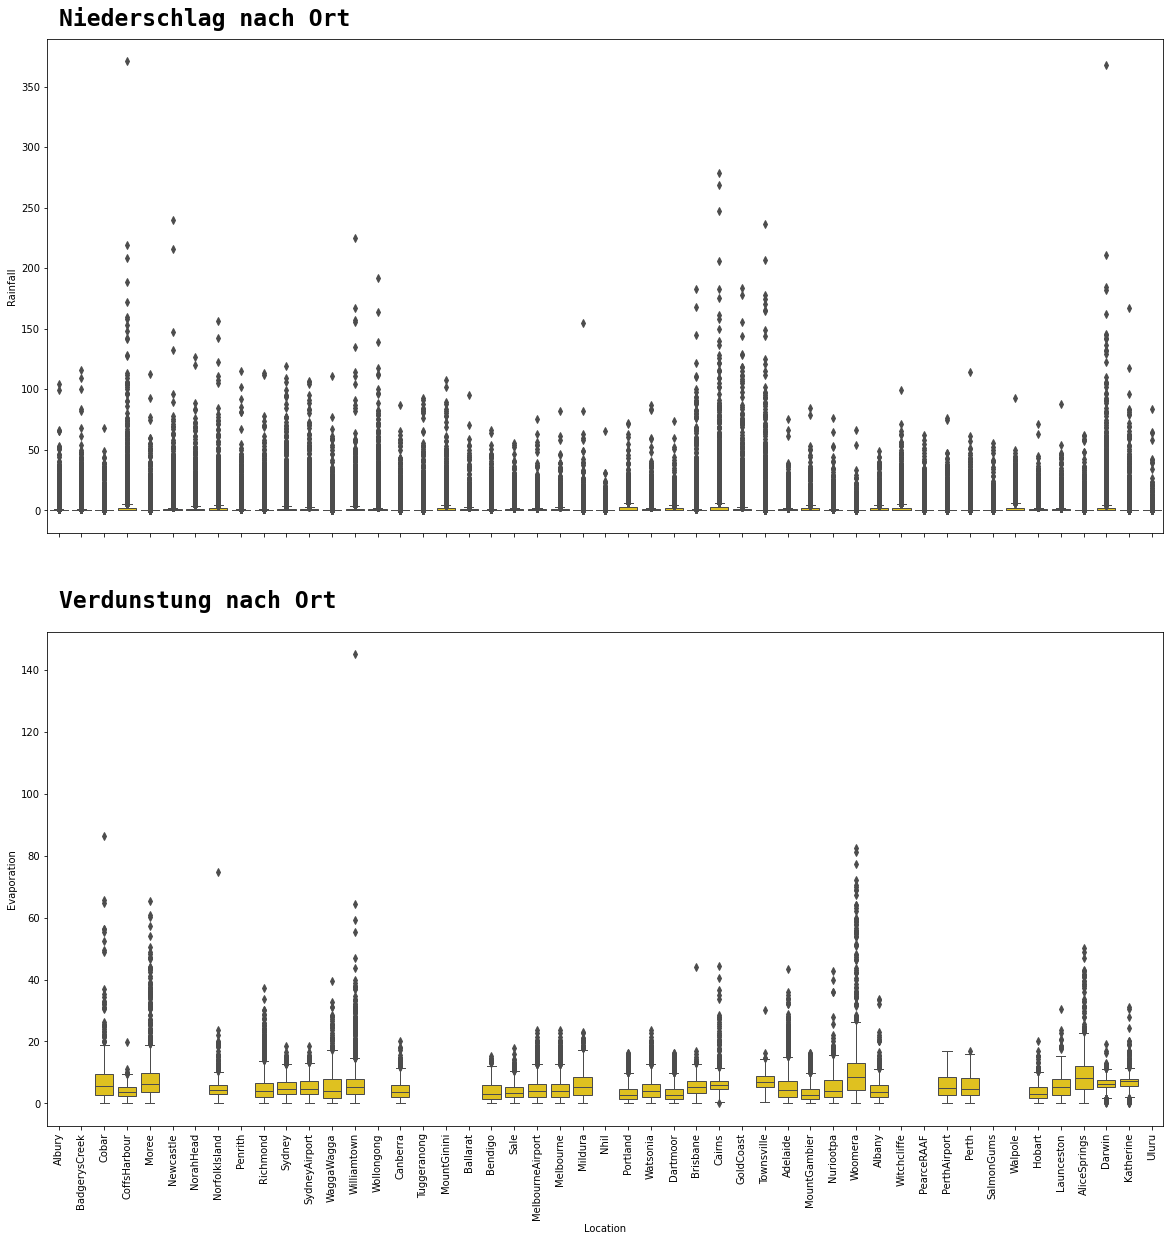

In [18]:
fig=plt.figure(figsize=(20,20),facecolor='white')
gs=fig.add_gridspec(2,1)
ax=[None for i in range(2)]

# MinTemp
ax[0]=fig.add_subplot(gs[0,0]);
ax[0].text(0, 400,'Niederschlag nach Ort',fontsize=23,fontweight='bold', fontfamily='monospace')
g = sns.boxplot(data=df, x='Location', y='Rainfall', ax=ax[0], color='gold', linewidth=1)
g.set(xticklabels=[])
g.set(xlabel=None)
# MaxTemp
ax[0]=fig.add_subplot(gs[1,0]);
ax[0].text(0, 160,'Verdunstung nach Ort',fontsize=23,fontweight='bold', fontfamily='monospace')
g = sns.boxplot(data=df, x='Location', y='Evaporation', ax=ax[0], color='gold', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

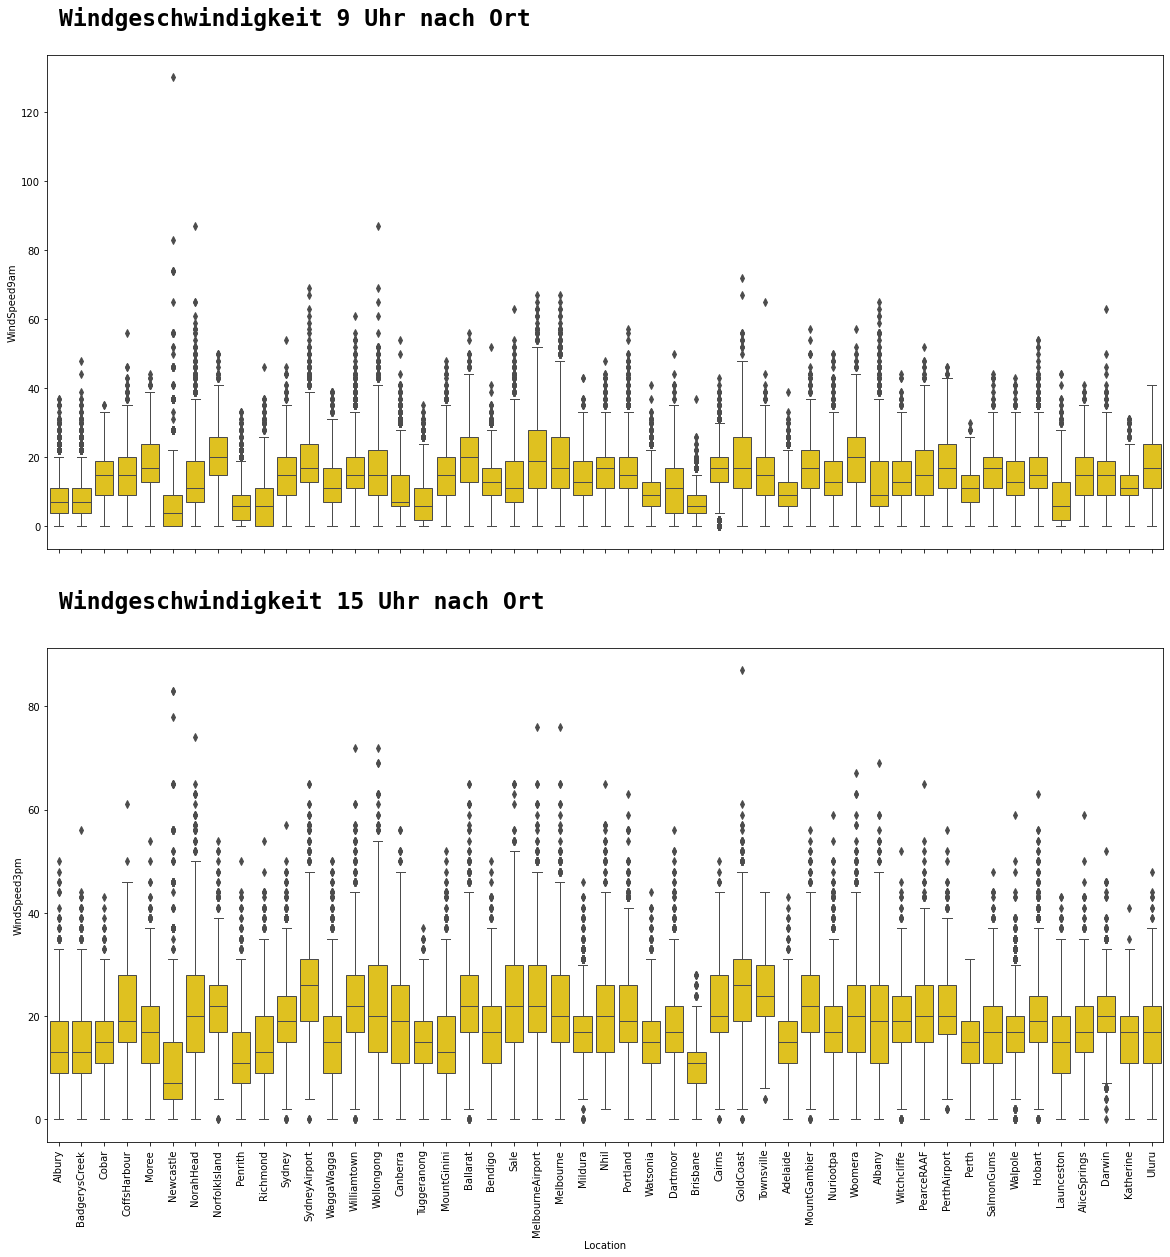

In [19]:
fig=plt.figure(figsize=(20,20),facecolor='white')
gs=fig.add_gridspec(2,1)
ax=[None for i in range(2)]

# MinTemp
ax[0]=fig.add_subplot(gs[0,0]);
ax[0].text(0, 145,'Windgeschwindigkeit 9 Uhr nach Ort',fontsize=23,fontweight='bold', fontfamily='monospace')
g = sns.boxplot(data=df, x='Location', y='WindSpeed9am', ax=ax[0], color='gold', linewidth=1)
g.set(xticklabels=[])
g.set(xlabel=None)
# MaxTemp
ax[0]=fig.add_subplot(gs[1,0]);
ax[0].text(0, 99,'Windgeschwindigkeit 15 Uhr nach Ort',fontsize=23,fontweight='bold', fontfamily='monospace')
g = sns.boxplot(data=df, x='Location', y='WindSpeed3pm', ax=ax[0], color='gold', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

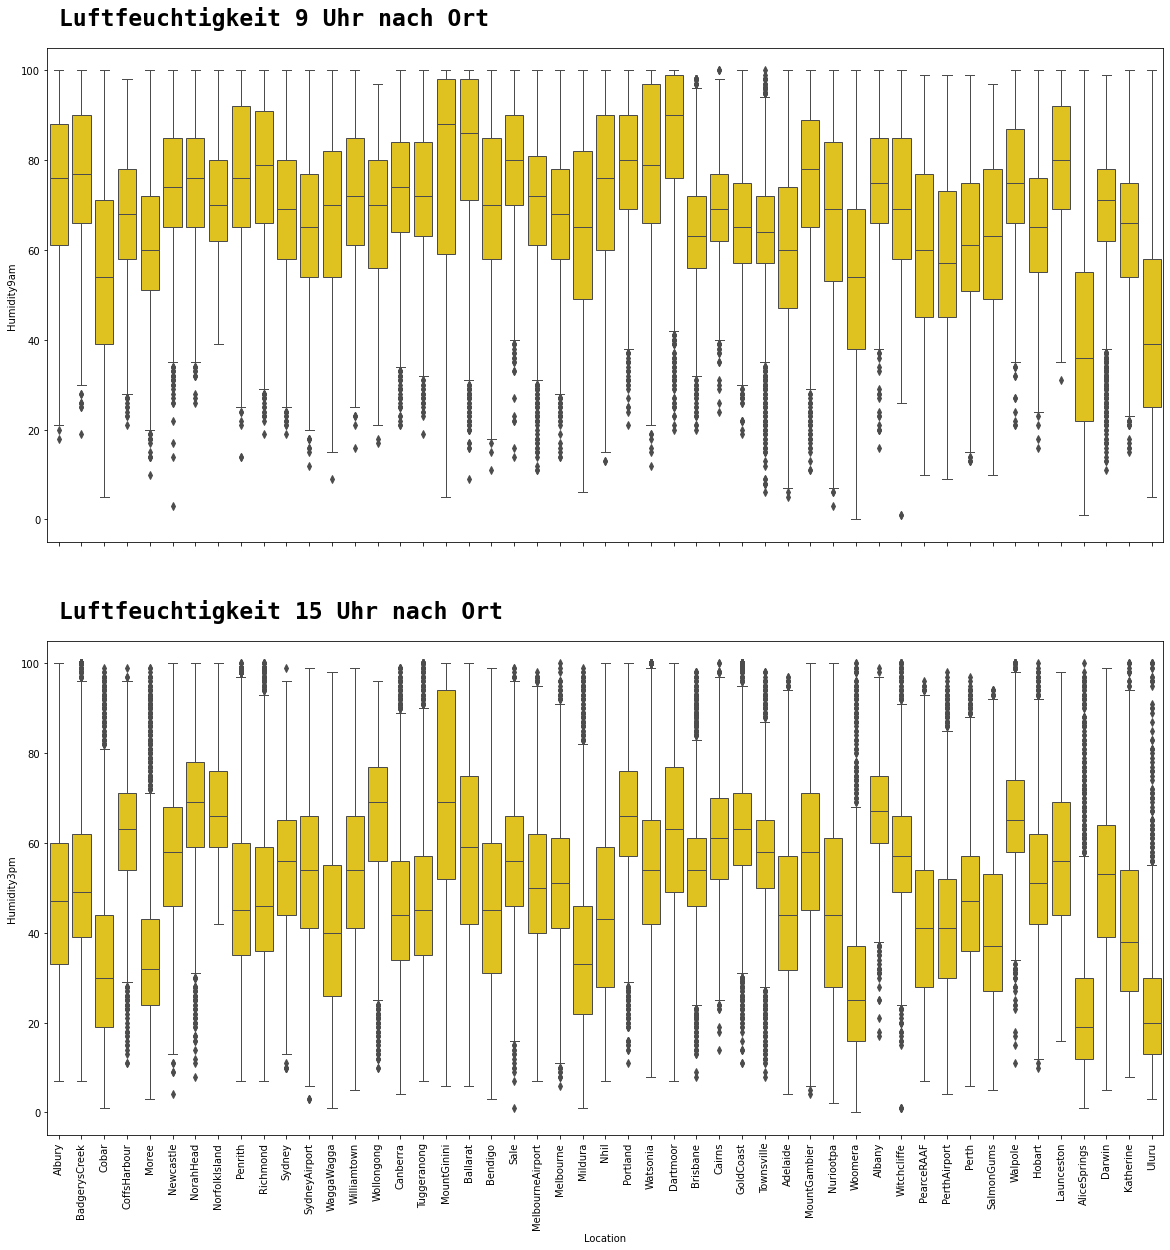

In [20]:
fig=plt.figure(figsize=(20,20),facecolor='white')
gs=fig.add_gridspec(2,1)
ax=[None for i in range(2)]

# MinTemp
ax[0]=fig.add_subplot(gs[0,0]);
ax[0].text(0, 110,'Luftfeuchtigkeit 9 Uhr nach Ort',fontsize=23,fontweight='bold', fontfamily='monospace')
g = sns.boxplot(data=df, x='Location', y='Humidity9am', ax=ax[0], color='gold', linewidth=1)
g.set(xticklabels=[])
g.set(xlabel=None)
# MaxTemp
ax[0]=fig.add_subplot(gs[1,0]);
ax[0].text(0, 110,'Luftfeuchtigkeit 15 Uhr nach Ort',fontsize=23,fontweight='bold', fontfamily='monospace')
g = sns.boxplot(data=df, x='Location', y='Humidity3pm', ax=ax[0], color='gold', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

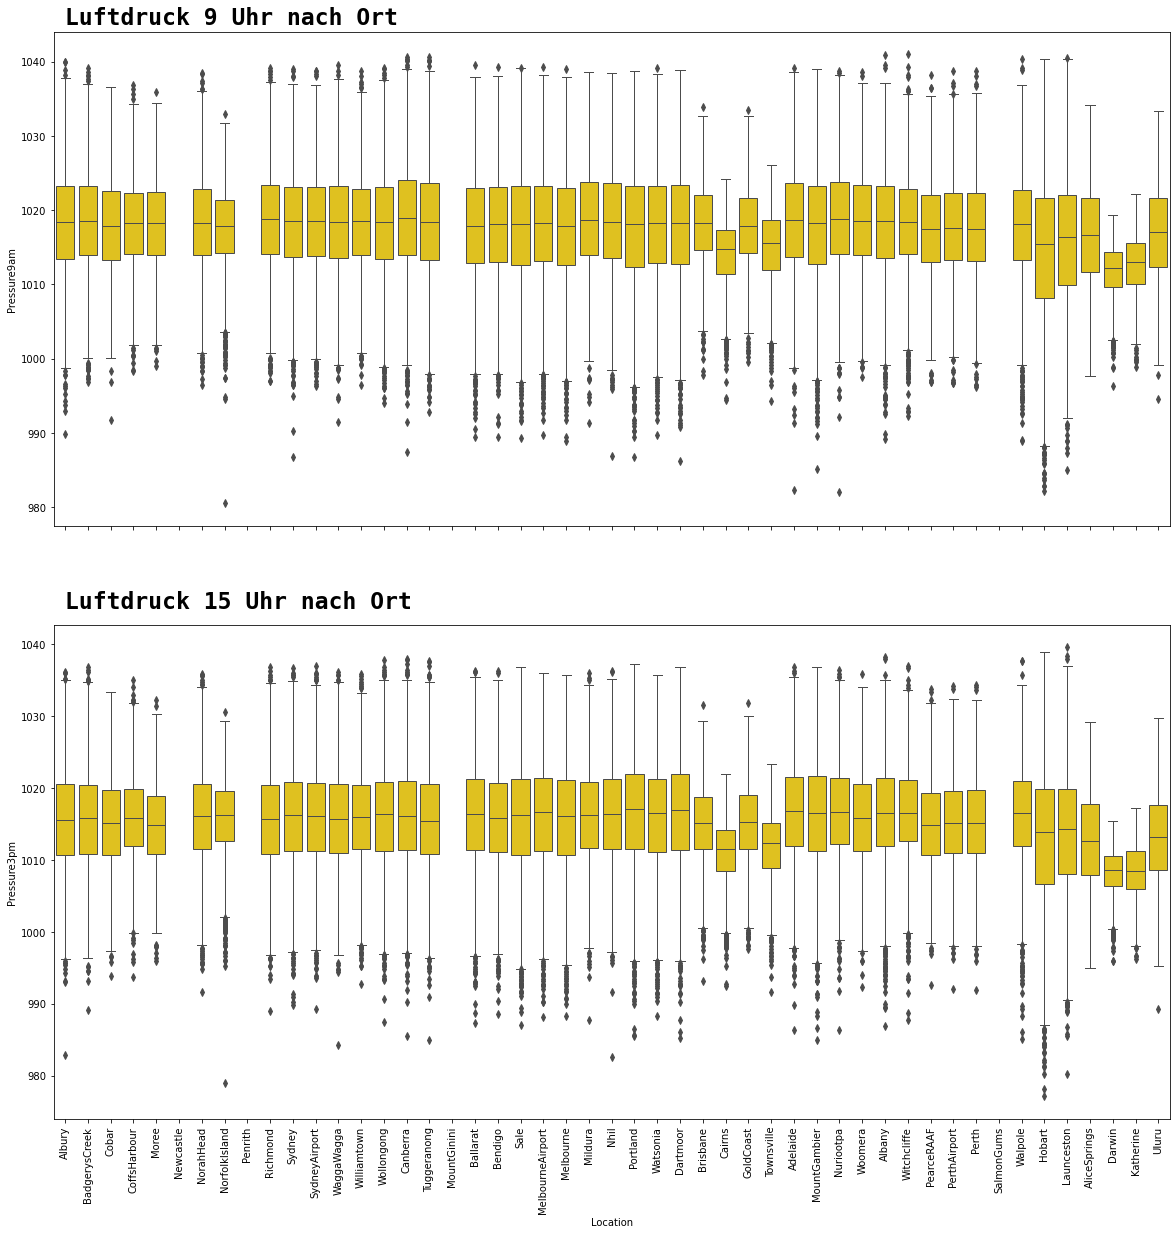

In [21]:
fig=plt.figure(figsize=(20,20),facecolor='white')
gs=fig.add_gridspec(2,1)
ax=[None for i in range(2)]

# MinTemp
ax[0]=fig.add_subplot(gs[0,0]);
ax[0].text(0, 1045,'Luftdruck 9 Uhr nach Ort',fontsize=23,fontweight='bold', fontfamily='monospace')
g = sns.boxplot(data=df, x='Location', y='Pressure9am', ax=ax[0], color='gold', linewidth=1)
g.set(xticklabels=[])
g.set(xlabel=None)
# MaxTemp
ax[0]=fig.add_subplot(gs[1,0]);
ax[0].text(0, 1045,'Luftdruck 15 Uhr nach Ort',fontsize=23,fontweight='bold', fontfamily='monospace')
g = sns.boxplot(data=df, x='Location', y='Pressure3pm', ax=ax[0], color='gold', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

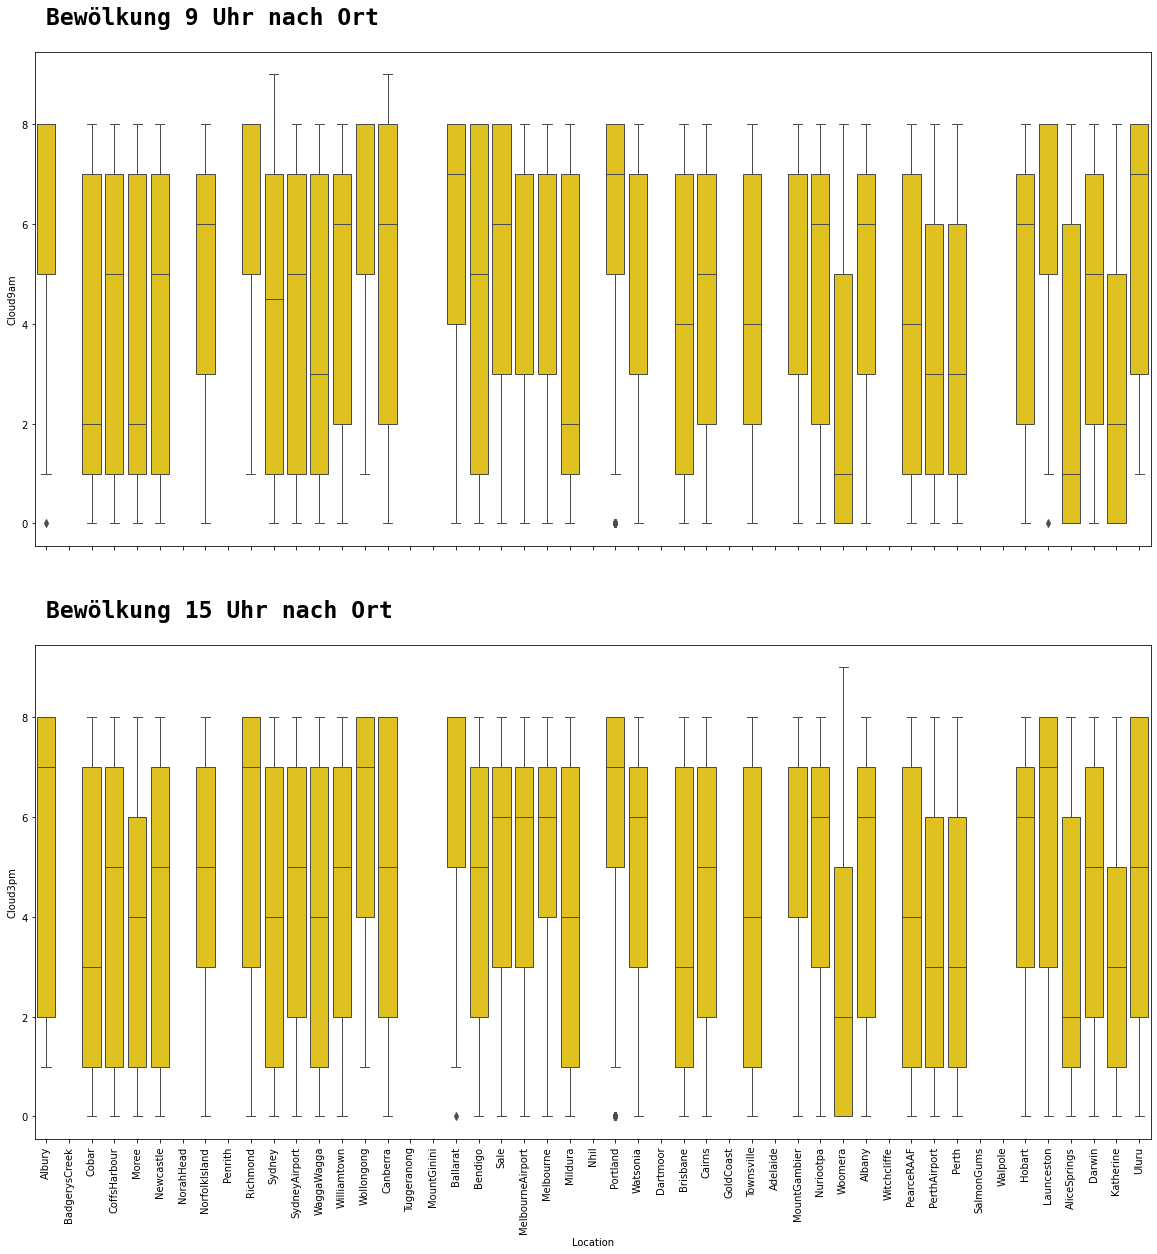

In [22]:
fig=plt.figure(figsize=(20,20),facecolor='white')
gs=fig.add_gridspec(2,1)
ax=[None for i in range(2)]

# MinTemp
ax[0]=fig.add_subplot(gs[0,0]);
ax[0].text(0, 10,'Bewölkung 9 Uhr nach Ort',fontsize=23,fontweight='bold', fontfamily='monospace')
g = sns.boxplot(data=df, x='Location', y='Cloud9am', ax=ax[0], color='gold', linewidth=1)
g.set(xticklabels=[])
g.set(xlabel=None)
# MaxTemp
ax[0]=fig.add_subplot(gs[1,0]);
ax[0].text(0, 10,'Bewölkung 15 Uhr nach Ort',fontsize=23,fontweight='bold', fontfamily='monospace')
g = sns.boxplot(data=df, x='Location', y='Cloud3pm', ax=ax[0], color='gold', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

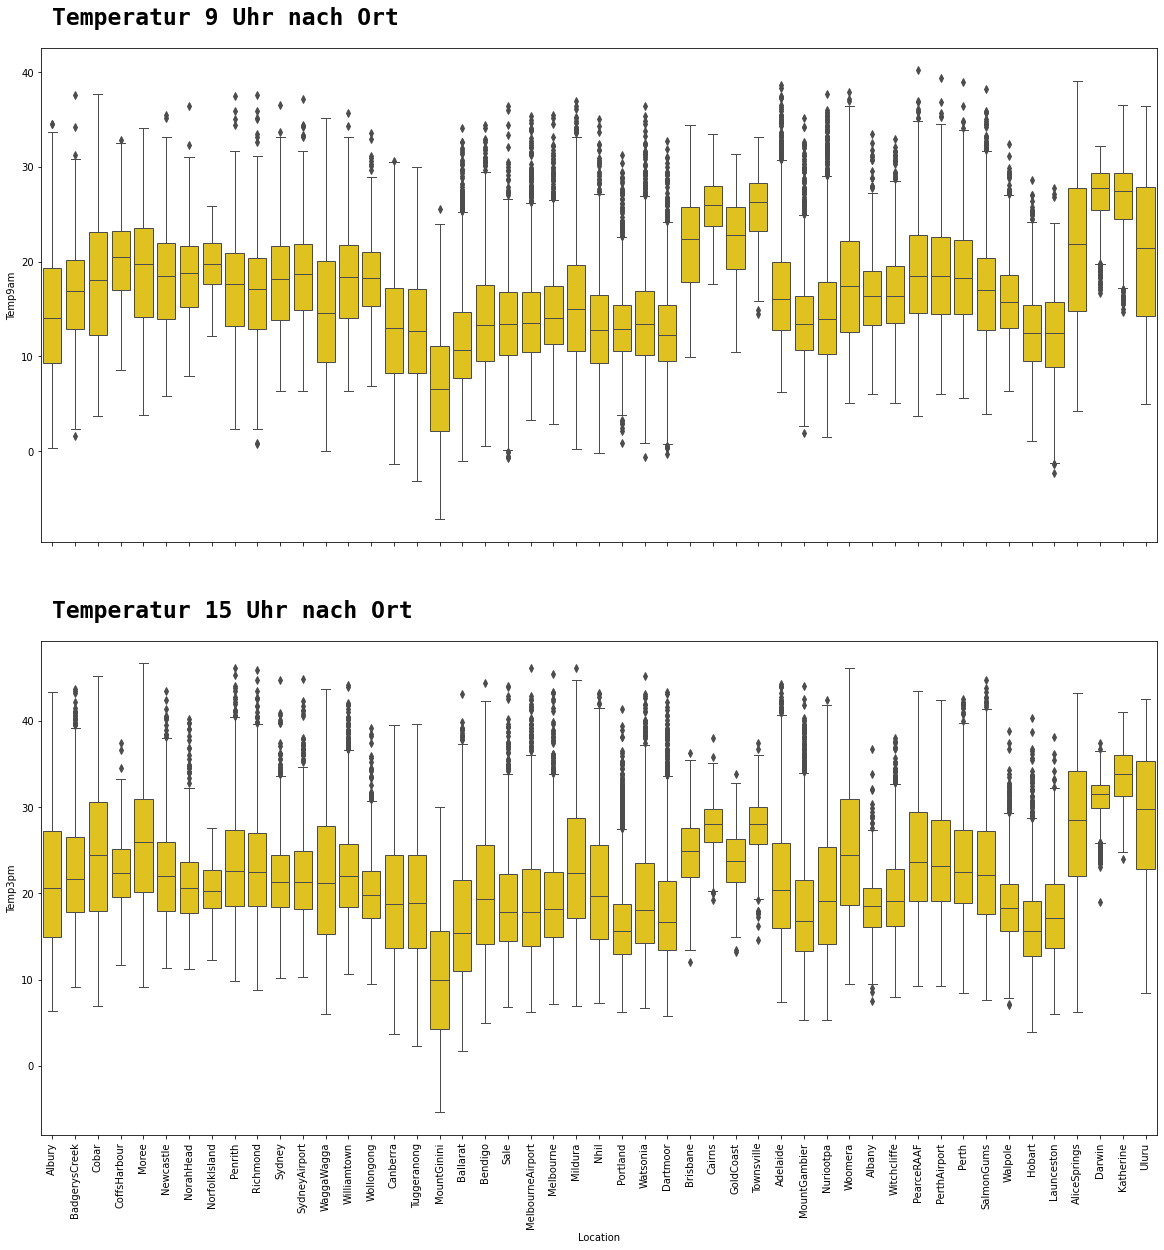

In [23]:
fig=plt.figure(figsize=(20,20),facecolor='white')
gs=fig.add_gridspec(2,1)
ax=[None for i in range(2)]

# MinTemp
ax[0]=fig.add_subplot(gs[0,0]);
ax[0].text(0, 45,'Temperatur 9 Uhr nach Ort',fontsize=23,fontweight='bold', fontfamily='monospace')
g = sns.boxplot(data=df, x='Location', y='Temp9am', ax=ax[0], color='gold', linewidth=1)
g.set(xticklabels=[])
g.set(xlabel=None)
# MaxTemp
ax[0]=fig.add_subplot(gs[1,0]);
ax[0].text(0, 52,'Temperatur 15 Uhr nach Ort',fontsize=23,fontweight='bold', fontfamily='monospace')
g = sns.boxplot(data=df, x='Location', y='Temp3pm', ax=ax[0], color='gold', linewidth=1)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

***
### Multivariate Analyse  <a name="eda-mul"></a>

Bei der multivariaten Analyse werden alle Merkmale und ihre Einflüsse aufeinander analysiert. Zuerst soll das anhand einer Datenmatrix ersichtlich gemacht werden, die als sogenannte "Heatmap" dargestellt wird.

<b> Heatmap</b>


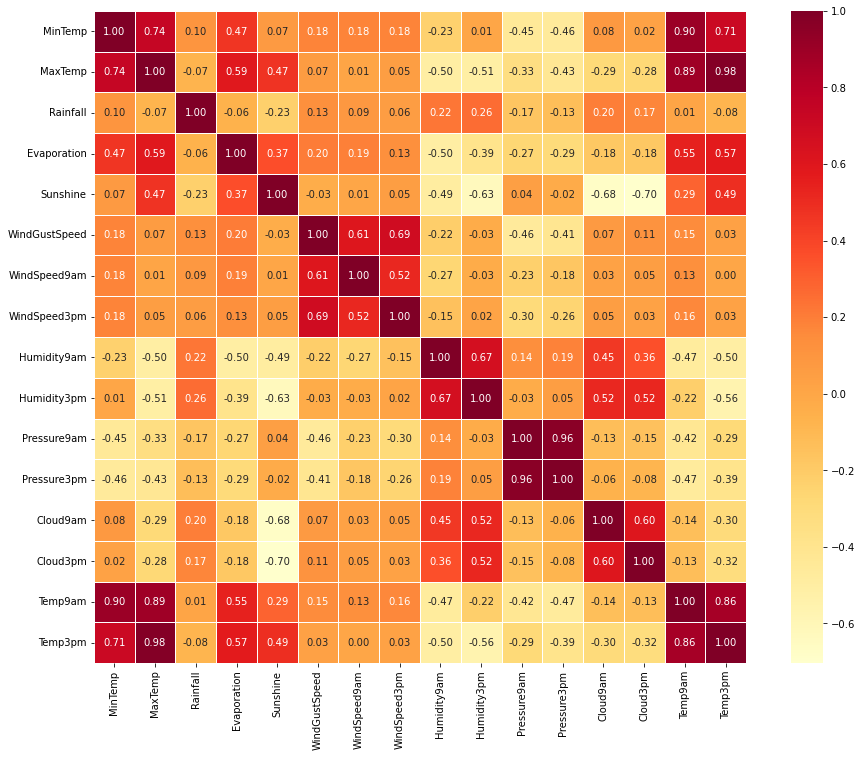

In [24]:
correlation = df.corr()
plt.figure(figsize=(16,12))

ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linewidths=.5, cmap='YlOrRd')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)           
plt.show()

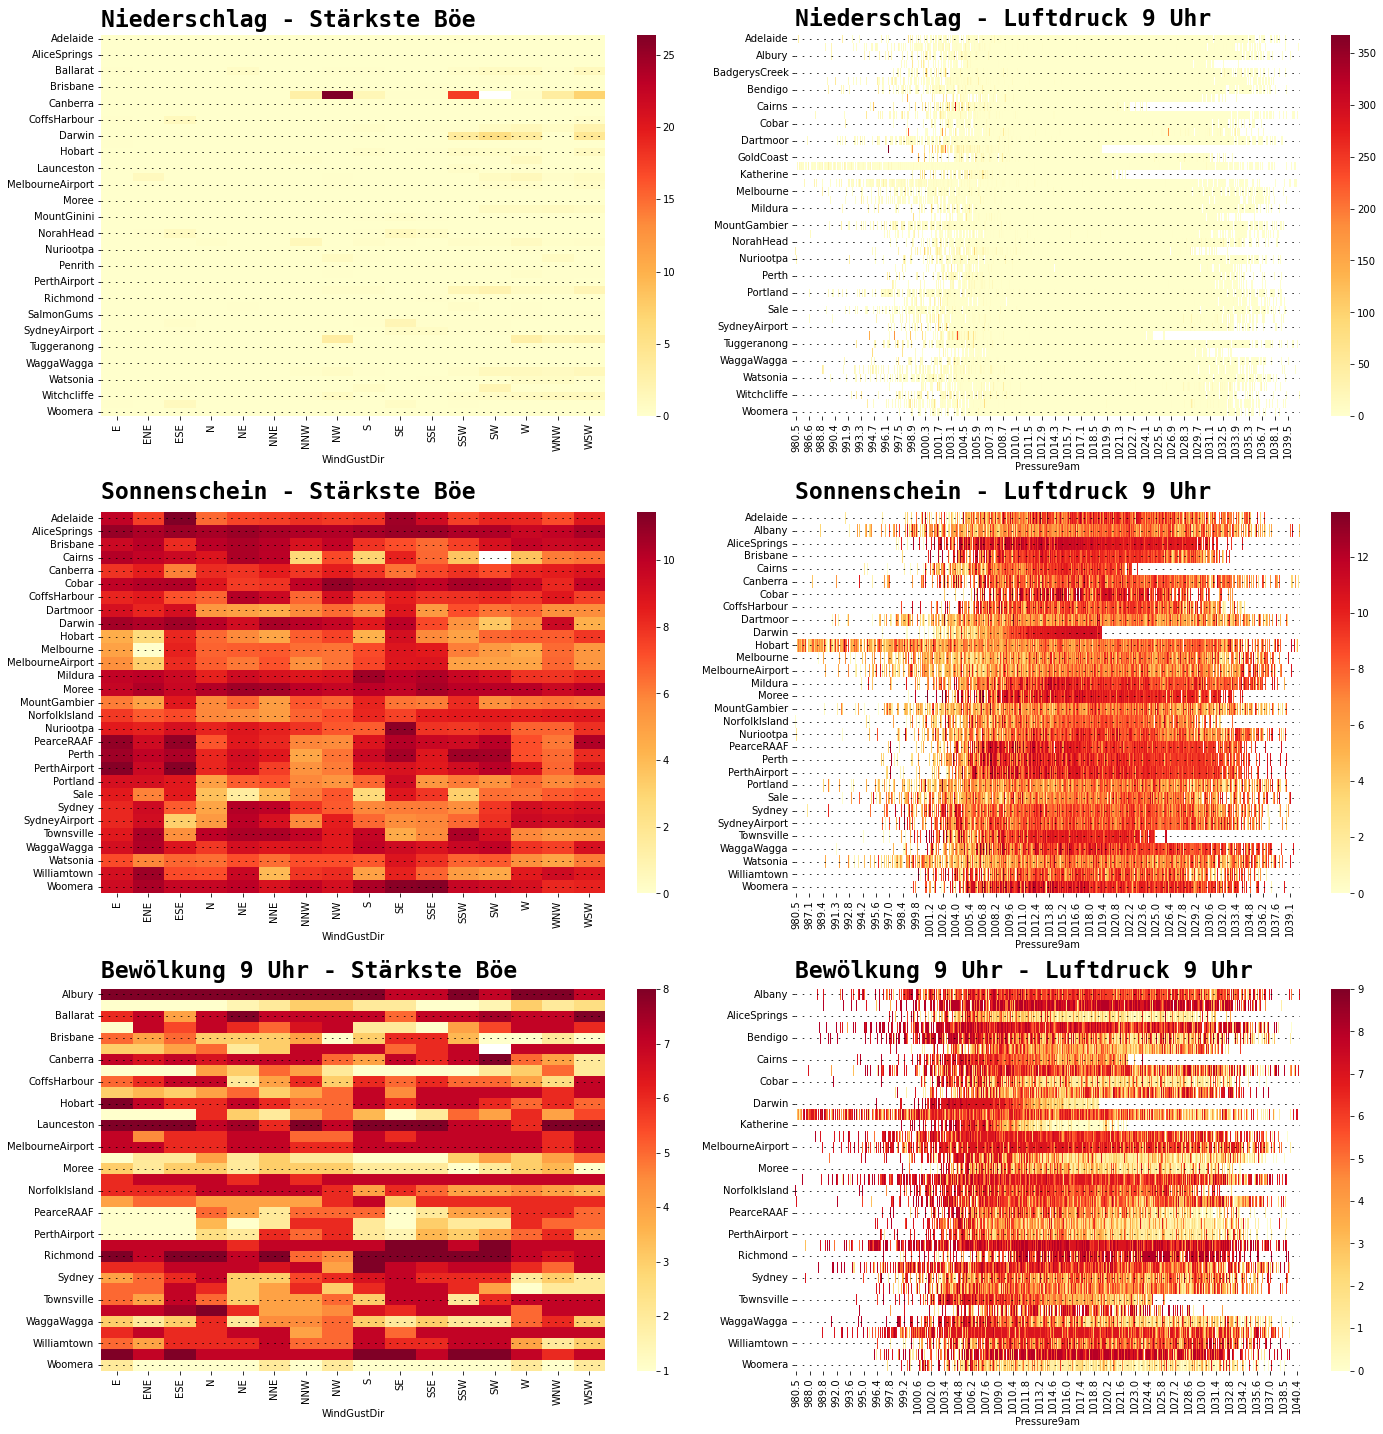

In [25]:
fig=plt.figure(figsize=(20,20),facecolor='white')
gs=fig.add_gridspec(3,2)
ax=[None for i in range(6)]

# Rainfall
ax[0]=fig.add_subplot(gs[0,0])
ax[0].text(0, -1,'Niederschlag - Stärkste Böe',fontsize=23,fontweight='bold', fontfamily='monospace')
table = pd.pivot_table(df, values='Rainfall', index='Location', columns='WindGustDir', aggfunc=np.median)
sns.heatmap(table, cmap='YlOrRd')
# Evaporation
ax[1]=fig.add_subplot(gs[0,1])
ax[1].text(0, -1,'Niederschlag - Luftdruck 9 Uhr',fontsize=23,fontweight='bold', fontfamily='monospace')
table = pd.pivot_table(df, values='Rainfall', index='Location', columns='Pressure9am', aggfunc=np.median)
sns.heatmap(table, cmap='YlOrRd')
# Windspeed (9AM)
ax[2]=fig.add_subplot(gs[1,0])
ax[2].text(0, -1,'Sonnenschein - Stärkste Böe',fontsize=23,fontweight='bold', fontfamily='monospace')
table = pd.pivot_table(df, values='Sunshine', index='Location', columns='WindGustDir', aggfunc=np.median)
sns.heatmap(table, cmap='YlOrRd')
# Windspeed (3PM)
ax[3]=fig.add_subplot(gs[1,1])
ax[3].text(0, -1,'Sonnenschein - Luftdruck 9 Uhr',fontsize=23,fontweight='bold', fontfamily='monospace')
table = pd.pivot_table(df, values='Sunshine', index='Location', columns='Pressure9am', aggfunc=np.median)
sns.heatmap(table, cmap='YlOrRd')
# Windspeed (9AM)
ax[4]=fig.add_subplot(gs[2,0])
ax[4].text(0, -1,'Bewölkung 9 Uhr - Stärkste Böe',fontsize=23,fontweight='bold', fontfamily='monospace')
table = pd.pivot_table(df, values='Cloud9am', index='Location', columns='WindGustDir', aggfunc=np.median)
sns.heatmap(table, cmap='YlOrRd')
# Windspeed (3PM)
ax[5]=fig.add_subplot(gs[2,1])
ax[5].text(0, -1,'Bewölkung 9 Uhr - Luftdruck 9 Uhr',fontsize=23,fontweight='bold', fontfamily='monospace')
table = pd.pivot_table(df, values='Cloud9am', index='Location', columns='Pressure9am', aggfunc=np.median)
sns.heatmap(table, cmap='YlOrRd')

for i in range(6):
    ax[i].set_ylabel('')
    ax[i].grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)
        
plt.tight_layout()

<b>Interpretation</b>

Je höher die Zahl (also je dunkler das Kästchen), desto stärker korrelieren die Merkmale zueinander. Ist die Zahl 0, gibt es keine Korrelation. Bei -1 herrscht umgekehrte Proportionalität (je mehr Wolken, desto weniger Sonnenschein). Dazu gehören:

- `MinTemp` $\leftrightarrow{}$ `MaxTemp`
- `Temp9am` $\leftrightarrow{}$ `Temp3pm`
- `WindGustSpeed` $\leftrightarrow{}$ `WindSpeed3pm`
- `Pressure9am` $\leftrightarrow{}$ `Pressure3pm`

<b>Pair Plot</b>

Als nächstes schauen wir uns die stark korrelierenden Merkmale im Pair Plot an.

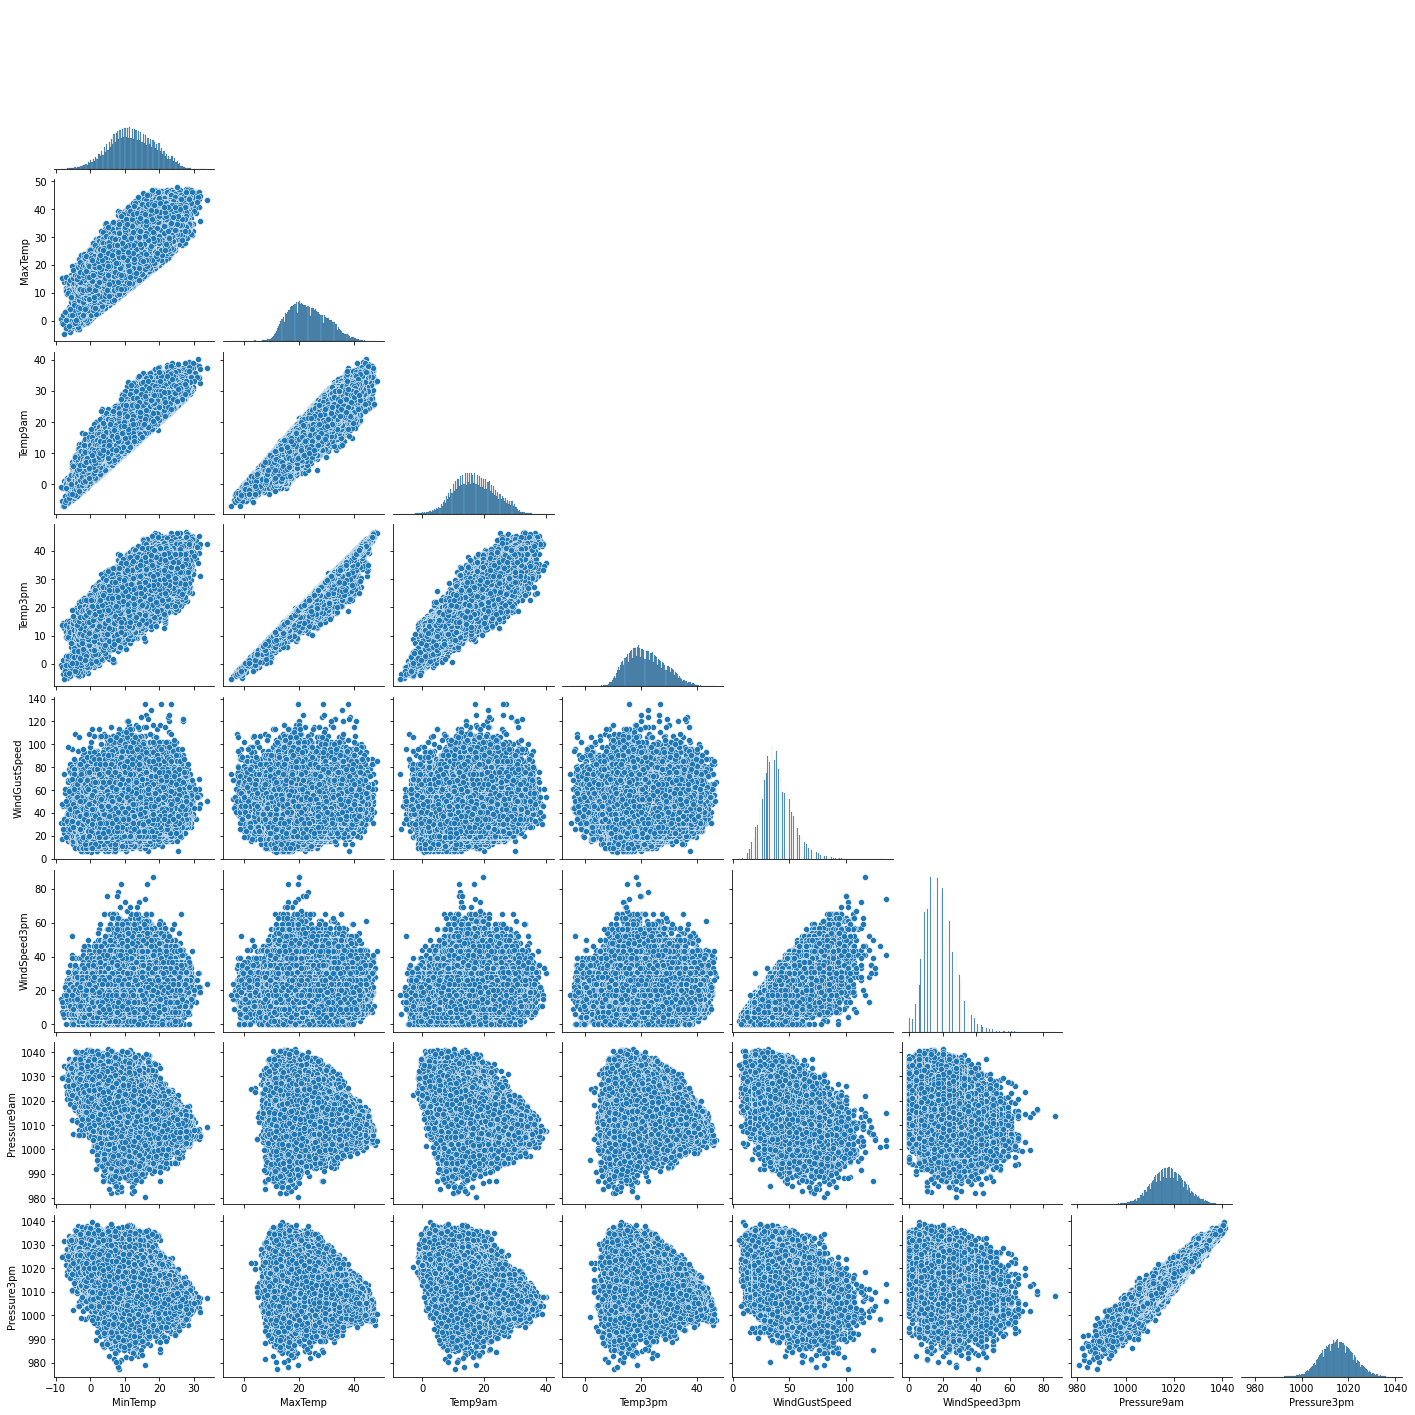

In [26]:
corVar = ['Location', 'MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']
sns.pairplot(df[corVar], kind='scatter', diag_kind='hist', corner=True, palette=palette1)
plt.show()

## Data Preparation <a name="dataprep"></a>
 Nun kümmern wir uns um die fehlenden Werte und teilen den Datensatz nach der `Location` auf, um eine bessere Übersicht zu bekommen

In [27]:
# Fehlende Werte eliminieren
df_nona = df.dropna(); # von 145'460 auf 56'420 -> evt. kritisch
df_nona.shape

(56420, 23)

Wenn wir alle fehlende Werte aus dem Datensatz streichen würden, hätten wir nur noch rund einen Drittel der Daten zur Verfügung.<br>
Wir werden deshalb die fehlenden Werte mit dem Median befüllen.

In [28]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].median())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].median())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].median())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].median())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].median())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].median())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].median())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].median())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].median())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].median())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].median())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].median())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].median())

Für die kategorischen Variablen, machen wir dasselbe mit der `.mode()` Funktion.

In [29]:
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Da wir nun keine fehlende Werte mehr haben, können wir uns dem encoding der kategorischen Variablen zuwenden.

In [30]:
from sklearn import preprocessing
df['WindDir9am'] = preprocessing.LabelEncoder().fit_transform(df['WindDir9am'])
df['WindDir3pm'] = preprocessing.LabelEncoder().fit_transform(df['WindDir3pm'])
df['WindGustDir'] = preprocessing.LabelEncoder().fit_transform(df['WindGustDir'])

Ebenfalls ersetzen wir `Yes / No` mit `1 / 0`

In [31]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

und geben jeder Location ihre Koordinaten.

In [32]:
df['lat'] = np.nan
df['lon'] = np.nan

# Behold, the almighty coordinates mapping procedure!
df['lat'] = np.where(df['Location']=='Albury', -36.073730, df['lat']) 
df['lon'] = np.where(df['Location']=='Albury', 146.913544, df['lon']) 

df['lat'] = np.where(df['Location']=='Adelaide', -34.928497, df['lat']) 
df['lon'] = np.where(df['Location']=='Adelaide', 138.600739, df['lon']) 

df['lat'] = np.where(df['Location']=='AliceSprings', -23.698042, df['lat']) 
df['lon'] = np.where(df['Location']=='AliceSprings', 133.880753, df['lon']) 

df['lat'] = np.where(df['Location']=='BadgerysCreek', -33.887421, df['lat']) 
df['lon'] = np.where(df['Location']=='BadgerysCreek', 150.740509, df['lon']) 

df['lat'] = np.where(df['Location']=='Ballarat', -37.5623025, df['lat']) 
df['lon'] = np.where(df['Location']=='Ballarat', 143.8605649, df['lon']) 

df['lat'] = np.where(df['Location']=='Bendigo', -36.7588767, df['lat']) 
df['lon'] = np.where(df['Location']=='Bendigo', 144.2825931, df['lon']) 

df['lat'] = np.where(df['Location']=='Brisbane', -27.4689682, df['lat']) 
df['lon'] = np.where(df['Location']=='Brisbane', 153.0234991, df['lon']) 

df['lat'] = np.where(df['Location']=='Cairns', -16.9206657, df['lat']) 
df['lon'] = np.where(df['Location']=='Cairns', 145.7721854, df['lon']) 

df['lat'] = np.where(df['Location']=='Cobar', -31.4983333, df['lat']) 
df['lon'] = np.where(df['Location']=='Cobar', 145.8344444, df['lon']) 

df['lat'] = np.where(df['Location']=='CoffsHarbour', -30.2962407, df['lat']) 
df['lon'] = np.where(df['Location']=='CoffsHarbour', 153.1135293, df['lon']) 

df['lat'] = np.where(df['Location']=='Moree', -29.4617202, df['lat']) 
df['lon'] = np.where(df['Location']=='Moree', 149.8407153, df['lon']) 

df['lat'] = np.where(df['Location']=='Newcastle', -32.9192953, df['lat']) 
df['lon'] = np.where(df['Location']=='Newcastle', 151.7795348, df['lon']) 

df['lat'] = np.where(df['Location']=='NorahHead', -33.2816667, df['lat']) 
df['lon'] = np.where(df['Location']=='NorahHead', 151.5677778, df['lon']) 

df['lat'] = np.where(df['Location']=='NorfolkIsland', -29.0289575, df['lat']) 
df['lon'] = np.where(df['Location']=='NorfolkIsland', 167.9587289, df['lon']) 

df['lat'] = np.where(df['Location']=='Penrith', -33.7510792, df['lat']) 
df['lon'] = np.where(df['Location']=='Penrith', 150.6941684, df['lon']) 

df['lat'] = np.where(df['Location']=='Richmond', -20.569655, df['lat']) 
df['lon'] = np.where(df['Location']=='Richmond', 142.9283602, df['lon']) 

df['lat'] = np.where(df['Location']=='Sydney', -33.8548157, df['lat']) 
df['lon'] = np.where(df['Location']=='Sydney', 151.2164539, df['lon']) 

df['lat'] = np.where(df['Location']=='SydneyAirport', -33.9498935, df['lat']) 
df['lon'] = np.where(df['Location']=='SydneyAirport', 151.1819682, df['lon']) 

df['lat'] = np.where(df['Location']=='WaggaWagga', -35.115, df['lat']) 
df['lon'] = np.where(df['Location']=='WaggaWagga', 147.3677778, df['lon']) 

df['lat'] = np.where(df['Location']=='Williamtown', -32.815, df['lat']) 
df['lon'] = np.where(df['Location']=='Williamtown', 151.8427778, df['lon']) 

df['lat'] = np.where(df['Location']=='Wollongong', -34.4243941, df['lat']) 
df['lon'] = np.where(df['Location']=='Wollongong', 150.89385, df['lon']) 

df['lat'] = np.where(df['Location']=='Canberra', -35.2975906, df['lat']) 
df['lon'] = np.where(df['Location']=='Canberra', 149.1012676, df['lon']) 

df['lat'] = np.where(df['Location']=='Tuggeranong', -35.4209771, df['lat']) 
df['lon'] = np.where(df['Location']=='Tuggeranong', 149.0921341, df['lon']) 

df['lat'] = np.where(df['Location']=='MountGinini', -35.5297196, df['lat']) 
df['lon'] = np.where(df['Location']=='MountGinini', 148.7726345, df['lon']) 

df['lat'] = np.where(df['Location']=='Sale', -38.1050358, df['lat']) 
df['lon'] = np.where(df['Location']=='Sale', 147.0647902, df['lon']) 

df['lat'] = np.where(df['Location']=='MelbourneAirport', -37.667111, df['lat']) 
df['lon'] = np.where(df['Location']=='MelbourneAirport', 144.8334808, df['lon']) 

df['lat'] = np.where(df['Location']=='Melbourne', -37.8142176, df['lat']) 
df['lon'] = np.where(df['Location']=='Melbourne', 144.9631608, df['lon']) 

df['lat'] = np.where(df['Location']=='Mildura', -34.1847265, df['lat']) 
df['lon'] = np.where(df['Location']=='Mildura', 142.1624972, df['lon']) 

df['lat'] = np.where(df['Location']=='Nhil', -35.4713087, df['lat']) 
df['lon'] = np.where(df['Location']=='Nhil', 141.3062355, df['lon']) 

df['lat'] = np.where(df['Location']=='Portland', -38.3456231, df['lat']) 
df['lon'] = np.where(df['Location']=='Portland', 141.6042304, df['lon']) 

df['lat'] = np.where(df['Location']=='Watsonia', -37.7110022, df['lat']) 
df['lon'] = np.where(df['Location']=='Watsonia', 145.083635, df['lon']) 

df['lat'] = np.where(df['Location']=='Dartmoor', -37.9225444, df['lat']) 
df['lon'] = np.where(df['Location']=='Dartmoor', 141.2766551, df['lon']) 

df['lat'] = np.where(df['Location']=='GoldCoast', -28.0023731, df['lat']) 
df['lon'] = np.where(df['Location']=='GoldCoast', 153.4145987, df['lon']) 

df['lat'] = np.where(df['Location']=='Townsville', -19.2569391, df['lat']) 
df['lon'] = np.where(df['Location']=='Townsville', 146.8239537, df['lon']) 

df['lat'] = np.where(df['Location']=='MountGambier', -37.8246698, df['lat']) 
df['lon'] = np.where(df['Location']=='MountGambier', 140.7820068, df['lon']) 

df['lat'] = np.where(df['Location']=='Nuriootpa', -34.4693354, df['lat']) 
df['lon'] = np.where(df['Location']=='Nuriootpa', 138.9939006, df['lon']) 

df['lat'] = np.where(df['Location']=='Woomera', -31.1999142, df['lat']) 
df['lon'] = np.where(df['Location']=='Woomera', 136.8253532, df['lon']) 

df['lat'] = np.where(df['Location']=='Albany', -35.0247822, df['lat']) 
df['lon'] = np.where(df['Location']=='Albany', 117.883608, df['lon']) 

df['lat'] = np.where(df['Location']=='Witchcliffe', -34.0263348, df['lat']) 
df['lon'] = np.where(df['Location']=='Witchcliffe', 115.1004768, df['lon']) 

df['lat'] = np.where(df['Location']=='PearceRAAF', -31.6739604, df['lat']) 
df['lon'] = np.where(df['Location']=='PearceRAAF', 116.0175435, df['lon']) 

df['lat'] = np.where(df['Location']=='PerthAirport', -31.9406095, df['lat']) 
df['lon'] = np.where(df['Location']=='PerthAirport', 115.9676077, df['lon']) 

df['lat'] = np.where(df['Location']=='Perth', -31.9527121, df['lat']) 
df['lon'] = np.where(df['Location']=='Perth', 115.8604796, df['lon']) 

df['lat'] = np.where(df['Location']=='SalmonGums', -32.9815347, df['lat']) 
df['lon'] = np.where(df['Location']=='SalmonGums', 121.6439417, df['lon']) 

df['lat'] = np.where(df['Location']=='Walpole', -34.9776796, df['lat']) 
df['lon'] = np.where(df['Location']=='Walpole', 116.7310063, df['lon']) 

df['lat'] = np.where(df['Location']=='Hobart', -42.8825088, df['lat']) 
df['lon'] = np.where(df['Location']=='Hobart', 147.3281233, df['lon']) 

df['lat'] = np.where(df['Location']=='Launceston', -41.4340813, df['lat']) 
df['lon'] = np.where(df['Location']=='Launceston', 147.1373496, df['lon']) 

df['lat'] = np.where(df['Location']=='Darwin', -12.46044, df['lat']) 
df['lon'] = np.where(df['Location']=='Darwin', 130.8410469, df['lon']) 

df['lat'] = np.where(df['Location']=='Katherine', -14.4646157, df['lat']) 
df['lon'] = np.where(df['Location']=='Katherine', 132.2635993, df['lon']) 

df['lat'] = np.where(df['Location']=='Uluru', -25.3455545, df['lat']) 
df['lon'] = np.where(df['Location']=='Uluru', 131.0369615, df['lon']) 


In [33]:
# import the library and its Marker clusterization service
!pip install folium
import folium
from folium.plugins import MarkerCluster
# Create a map object and center it to the avarage coordinates to m
m = folium.Map(location=df[["lat", "lon"]].mean().to_list(), zoom_start=4)
# if the points are too close to each other, cluster them, create a cluster overlay with MarkerCluster, add to m
marker_cluster = MarkerCluster().add_to(m)
# draw only once per location
df_loc = df.drop_duplicates(subset = ["Location"])
# draw the markers and assign popup and hover texts
# add the markers the the cluster layers so that they are automatically clustered
for i,r in df_loc.iterrows():
    location = (r["lat"], r["lon"])
    folium.Marker(location=location,
                      popup = r['Location'],
                      tooltip=sum(df['Location'] == r['Location']))\
    .add_to(marker_cluster)
# display the map
m

In [34]:
# Zeitstempel umformatieren
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace = True)

# Kontrolle
pd.pivot_table(df, index='Location', aggfunc=np.mean).T

Location,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
Cloud3pm,5.000000,4.852961,5.190789,3.458882,5.000000,5.842434,4.892105,3.880676,4.487171,4.863795,...,4.102632,5.000000,4.956274,4.241276,5.000000,5.263210,4.595547,5.000000,5.398684,3.353274
Cloud9am,5.000000,5.189145,5.589803,3.082566,5.000000,5.654605,4.591118,3.918885,4.590132,4.911234,...,4.340132,5.000000,5.119772,3.939847,5.000000,5.246261,4.760053,5.000000,5.540789,2.826520
Day,15.719699,15.715461,15.715461,15.715461,15.712529,15.715461,15.715461,15.719699,15.715461,15.717986,...,15.715461,15.710431,15.692649,15.712529,15.698270,15.712529,15.712529,15.712529,15.715461,15.712529
Evaporation,5.317852,4.269309,4.800000,8.727895,4.800000,4.800000,4.430362,5.404322,6.079572,4.586554,...,7.127138,4.800000,4.800000,5.161449,4.800000,4.644533,6.094350,4.800000,4.800000,9.362147
Humidity3pm,44.839336,63.778947,47.880263,24.177303,51.393154,59.014803,46.477961,53.903226,61.751645,45.846915,...,57.400987,47.206318,24.198352,42.586574,66.030273,54.708873,53.933200,57.330675,64.999013,28.614158
Humidity9am,59.717194,74.727961,74.058553,39.720066,76.772017,81.736184,70.544408,64.051049,69.936842,73.159488,...,63.954276,72.808490,42.923954,67.859089,75.991018,78.344965,71.769026,71.255899,67.684211,53.200399
MaxTemp,12.579142,12.928783,9.539539,13.141908,11.142107,7.369474,8.595954,16.411337,21.217434,6.830908,...,20.412336,7.243699,14.411977,9.617182,11.808882,10.136225,12.779661,10.778730,14.924967,13.361914
MinTemp,12.579142,12.928783,9.539539,13.141908,11.142107,7.369474,8.595954,16.411337,21.217434,6.830908,...,20.412336,7.243699,14.411977,9.617182,11.808882,10.136225,12.779661,10.778730,14.924967,13.361914
Month,6.534294,6.410855,6.410855,6.410855,6.353274,6.410855,6.410855,6.534294,6.410855,6.461874,...,6.410855,6.412636,6.367554,6.353274,6.352628,6.353274,6.353274,6.353274,6.410855,6.353274
Pressure3pm,1016.799749,1016.486612,1015.759276,1012.874211,1015.610103,1016.262039,1015.870921,1015.099530,1011.099441,1016.169645,...,1011.905691,1015.654031,1013.312548,1015.859854,1016.228077,1016.085045,1015.917115,1016.664706,1016.050461,1015.966334


### Deklarieren des Targets


In [35]:
X = df.drop(['RainTomorrow', 'Location'], axis=1) # Alle features
y = df['RainTomorrow'] # Target

"RainTomorrow" ist unser Target. Für alle Features werden die Werte von "RainTomorrow" und "Location" eliminiert, da sie weiter nicht benötigt werden.

### Datensatz in training und test aufteilen

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Trainingsdaten vs Testdaten
X_train.shape, X_test.shape

((116368, 25), (29092, 25))

Die in der EDA auffällig Schiefen Kategorien werden nun korrigiert. Dazu werden alle Ausreisser mit dem 75%-Quantil ersetzt.

In [37]:
#2.0, 14.6, 37.0, 40.5
def max_value(df1, variable, top):
    return np.where(df1[variable]>top, top, df1[variable]);

for df in [X_train, X_test]:
    df['Rainfall'] = max_value(df, 'Rainfall', 2.0)
    df['Evaporation'] = max_value(df, 'Evaporation', 14.6)
    df['WindSpeed9am'] = max_value(df, 'WindSpeed9am', 37.0)
    df['WindSpeed3pm'] = max_value(df, 'WindSpeed3pm', 40.5)

C:\Users\alexk\AppData\Local\Temp/ipykernel_9460/1222557316.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rainfall'] = max_value(df, 'Rainfall', 2.0)
C:\Users\alexk\AppData\Local\Temp/ipykernel_9460/1222557316.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Evaporation'] = max_value(df, 'Evaporation', 14.6)
C:\Users\alexk\AppData\Local\Temp/ipykernel_9460/1222557316.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

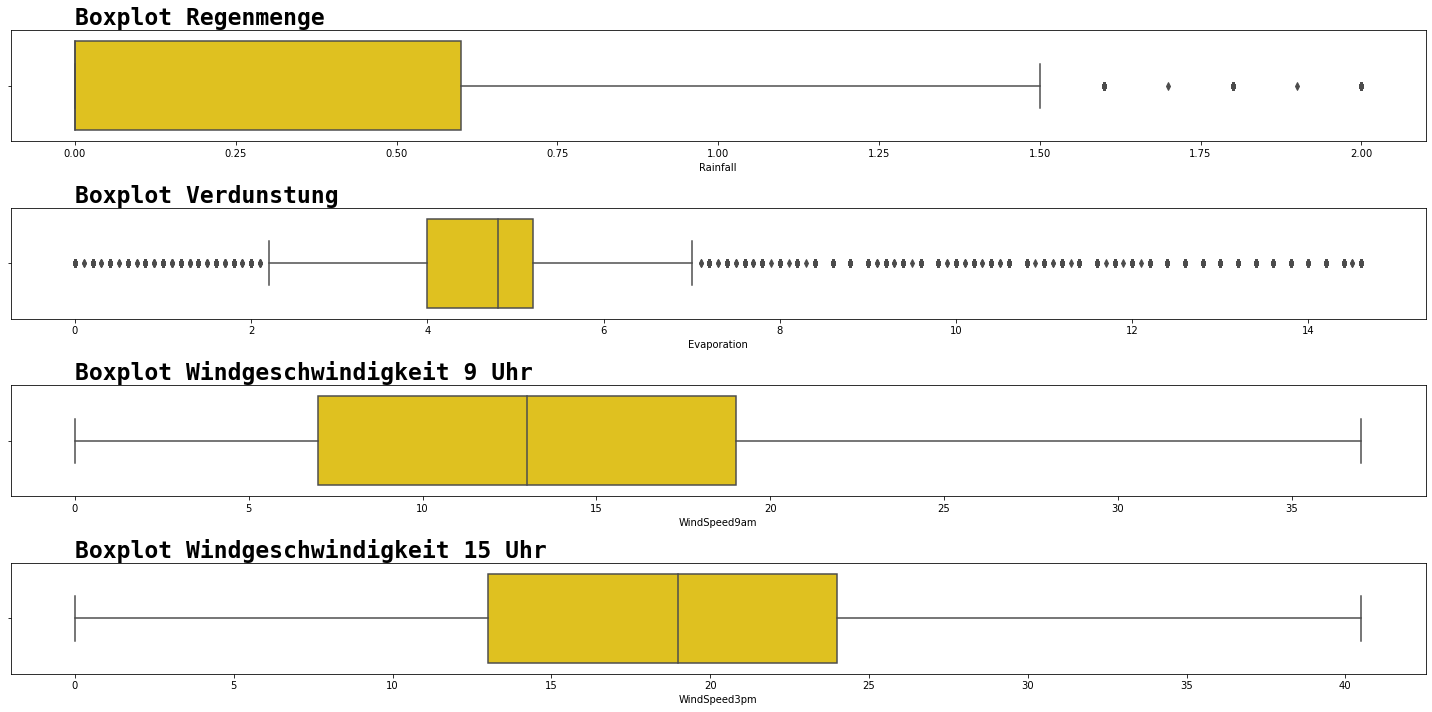

In [38]:
fig=plt.figure(figsize=(20,10),facecolor='white')
gs=fig.add_gridspec(4,1)

# Ausreisser in 'Rainfall' finden
ax[0]=fig.add_subplot(gs[0,0])
ax[0].text(0,-0.55, "Boxplot Regenmenge",fontsize=23,fontweight='bold', fontfamily='monospace')
sns.boxplot(x = 'Rainfall', data = df, palette = palette1);

# Ausreisser in 'Evaporation' finden
ax[0]=fig.add_subplot(gs[1,0])
ax[0].text(0,-0.55, "Boxplot Verdunstung",fontsize=23,fontweight='bold', fontfamily='monospace')
sns.boxplot(x = 'Evaporation', data = df, palette = palette1);

# Ausreisser in 'WindSpeed9am' finden
ax[0]=fig.add_subplot(gs[2,0])
ax[0].text(0,-0.55, "Boxplot Windgeschwindigkeit 9 Uhr",fontsize=23,fontweight='bold', fontfamily='monospace')
sns.boxplot(x = 'WindSpeed9am', data = df, palette = palette1);

# Ausreisser in 'WindSpeed3pm' finden
ax[0]=fig.add_subplot(gs[3,0])
ax[0].text(0,-0.55, "Boxplot Windgeschwindigkeit 15 Uhr",fontsize=23,fontweight='bold', fontfamily='monospace')
sns.boxplot(x = 'WindSpeed3pm', data = df, palette = palette1);

plt.tight_layout();

Die Boxplots sind jetzt angenehmer zu interpretieren.

***
***
## No Free Lunch <a name="nfl"></a>
In den folgenden Abschnitten werden verschiedene Learner getestet und miteinander verglichen. Es soll der beste Learner für die Auswertung unserer Daten gefunden werden.


### k-Nearest-Neighbors <a name="knn"></a>
Damit unser kNN-Algorithmus optimal funktioniert, werden alle Daten mit dem Standardscaler standardisiert.

In [39]:
# Zuerst Daten skalieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Ein ideales k soll gefunden werden. Dafür wird k von 1 bis 40 iteriert. Die Ergebnisse des idealen k werden in Diagrammen dargestellt.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracyList = []; precisionList=[]; recallList=[]; foneList=[];
# Calculating error for K values between 1 and 40

best_accuracy = 0;
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    accuracyList.append(accuracy_score(y_test, y_pred_i))
    foneList.append(f1_score(y_test, y_pred_i, average='weighted'))
    precisionList.append(precision_score(y_test, y_pred_i, average='weighted'))
    recallList.append(recall_score(y_test, y_pred_i, average='weighted'))
    if accuracyList[i-1] > best_accuracy:
        y_pred = y_pred_i
        best_accuracy = accuracyList[i-1]

Der kNN funktionert am besten im niedrigdimensionalen Raum. Mit unseren 25 scheint der Algortihmus ein passender zu sein, jedoch ist unsere Datenmenge hoch, was zu einem hohen Rechenaufwand führen wird.

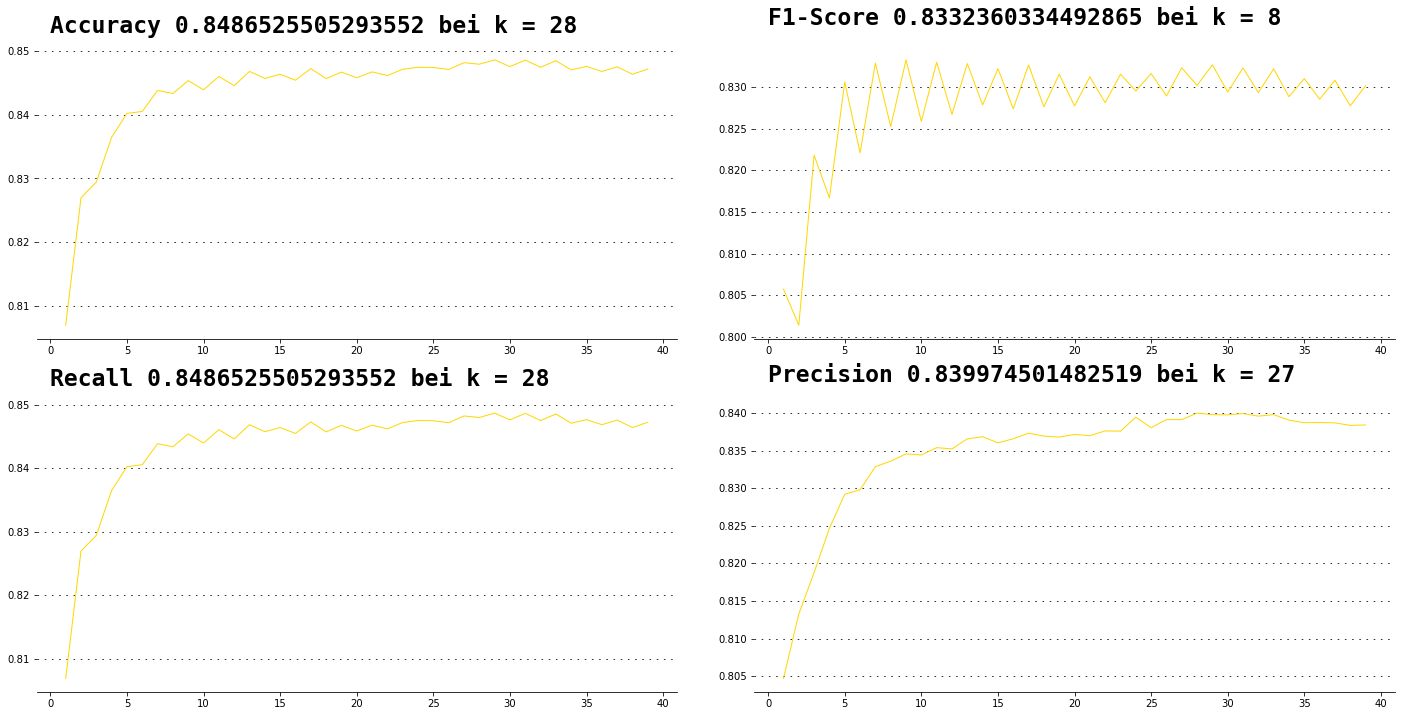

In [41]:
k_values = range(1, 40)

fig=plt.figure(figsize=(20,10),facecolor='white')
gs=fig.add_gridspec(2,2)
ax=[None for i in range(4)]

# Accuracy
max_val = max(accuracyList)
max_idx = accuracyList.index(max_val)
ax[0]=fig.add_subplot(gs[0,0])
ax[0].text(0, max_val*1.005,'Accuracy ' + str(max_val) + ' bei k = ' + str(max_idx) , fontsize=23, fontweight='bold', fontfamily='monospace')
sns.lineplot(x=k_values, y=accuracyList, ax=ax[0], palette=palette1, color="gold", linewidth=1)
# F1-Score
max_val = max(foneList)
max_idx = foneList.index(max_val)
ax[1]=fig.add_subplot(gs[0,1])
ax[1].text(0, max_val*1.005,'F1-Score ' + str(max_val) + ' bei k = ' + str(max_idx), fontsize=23, fontweight='bold', fontfamily='monospace')
sns.lineplot(x=k_values, y=foneList, ax=ax[1], palette=palette1, color="gold", linewidth=1)
# Recall
max_val = max(recallList)
max_idx = recallList.index(max_val)
ax[2]=fig.add_subplot(gs[1,0])
ax[2].text(0, max_val*1.005,'Recall ' + str(max_val) + ' bei k = ' + str(max_idx), fontsize=23, fontweight='bold', fontfamily='monospace')
sns.lineplot(x=k_values, y=recallList, ax=ax[2], palette=palette1, color="gold", linewidth=1)
# Precision
max_val = max(precisionList)
max_idx = precisionList.index(max_val)
ax[3]=fig.add_subplot(gs[1,1])
ax[3].text(0, max_val*1.005,'Precision ' + str(max_val) + ' bei k = ' + str(max_idx), fontsize=23, fontweight='bold', fontfamily='monospace')
sns.lineplot(x=k_values, y=precisionList, ax=ax[3], palette=palette1, color="gold", linewidth=1)

for i in range(4):
    ax[i].set_ylabel('')
    ax[i].grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)
        
plt.tight_layout()
plt.savefig('plt/knn_scores.png')

Die oben Dargestellten Diagramme visualisieren die Qualtitätsmasse (Accuracy, F1-Score, Recall, Precision) für die Klassifizierung bei verschiedenen Werten für k. Es ergibt sich ein optimales k von 26. Um den kNN später mit anderen Learnern vergleichen zu können, erstellen wir eine Konfusionsmatrix zu den Ergebnissen unserer Test-Daten.

Konfusionsmatrix:
   * oben links: right negative - richtige Vorhersage, kein Regen
   * unten rechts: right positive - richtige Vorhersage, Regen
   * oben rechts: false positive - falsche Vorhersage, Regen vorhergesagt
   * unten links: false negative - falsche Vorhersage, kein Regen vorhergesagt

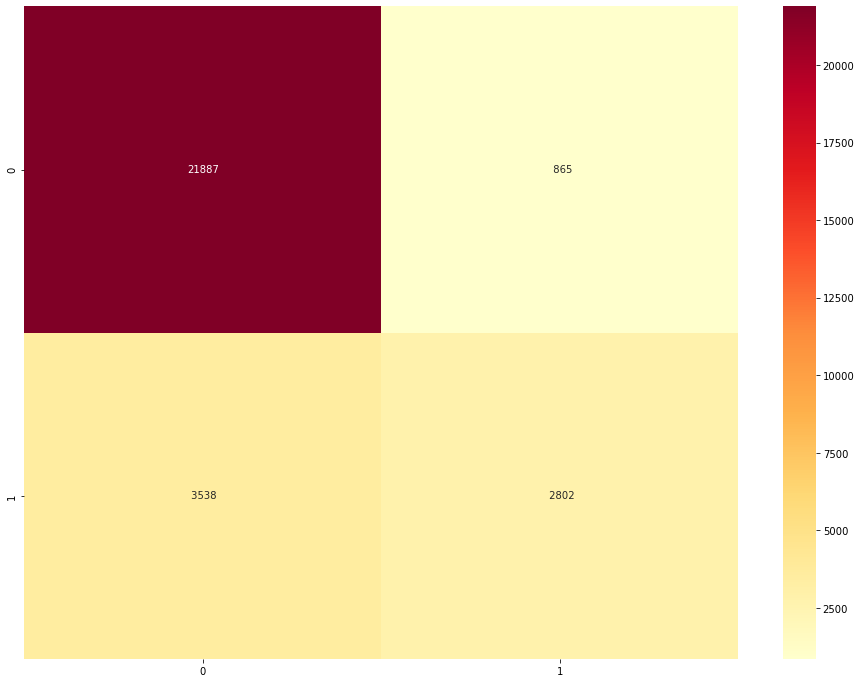

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

plt.figure(figsize=(16,12))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='YlOrRd', fmt='5.0f');
plt.savefig('plt/knn_confusion-matrix.png')
# [True Negative   False Positive]
# [False Negative  True Positive]

In [43]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline


pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=26))

train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_knn, X=X_train, y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, n_jobs=-1)

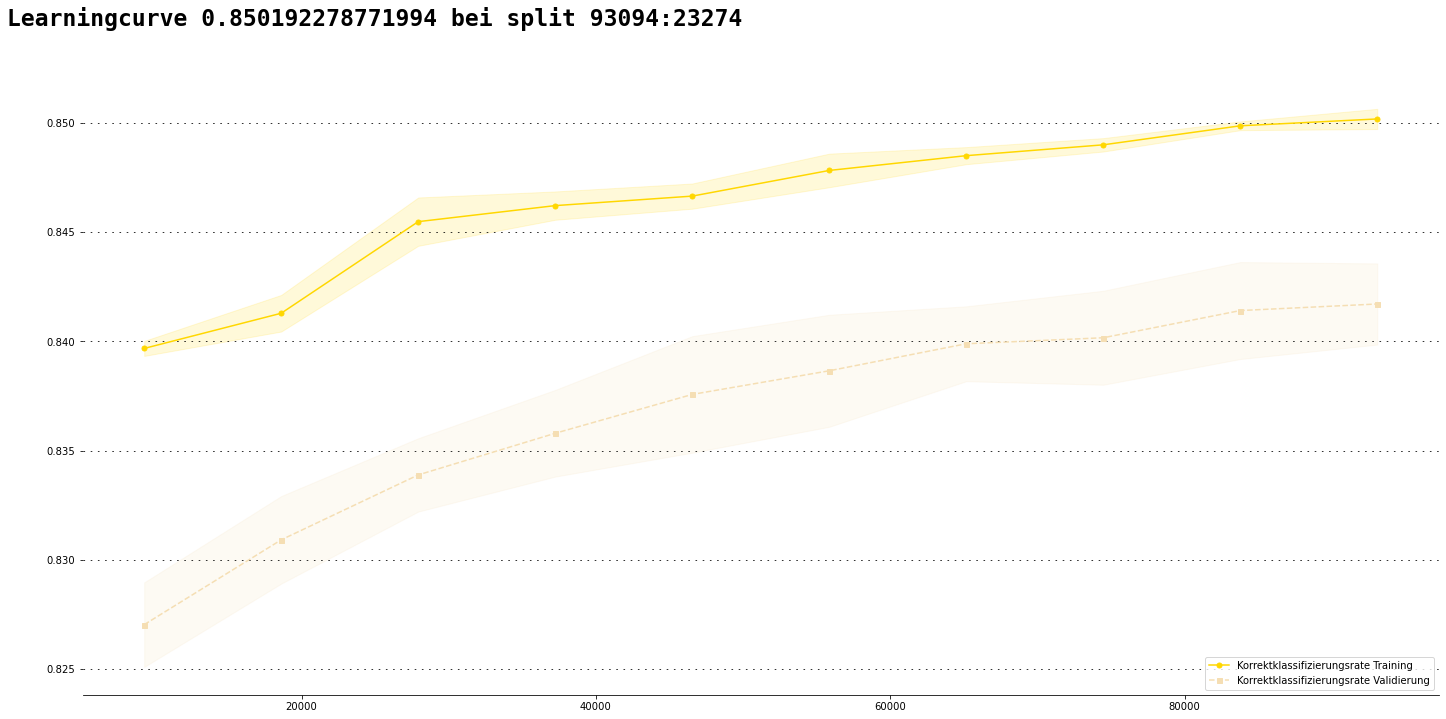

In [44]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

if max(train_mean) > max(test_mean):
    max_val = max(train_mean)
    max_idx = np.argmax(train_mean, axis=0)
else:
    max_val = max(test_mean)
    max_idx = np.argmax(test_mean, axis=0)


max_idx = train_sizes[max_idx]
fig=plt.figure(figsize=(20,10),facecolor='white')
gs=fig.add_gridspec(1,1)
ax=[None for i in range(1)]

# Learning curve bei train:test split
ax[0]=fig.add_subplot(gs[0,0])
ax[0].text(0, max_val*1.005,'Learningcurve ' + str(max_val) + ' bei split ' + str(max_idx) + ':'+str(len(X_train)-max_idx), fontsize=23, fontweight='bold', fontfamily='monospace')
plt.plot(train_sizes, train_mean,
    color='gold', marker='o',
    markersize=5,
    label='Korrektklassifizierungsrate Training')
plt.fill_between(train_sizes,
    train_mean + train_std,
    train_mean - train_std,
    alpha=0.15, color='gold')
plt.plot(train_sizes, test_mean,
    color='wheat', linestyle='--',
    marker='s', markersize=5,
    label='Korrektklassifizierungsrate Validierung')
plt.fill_between(train_sizes,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='wheat')

for i in range(1):
    ax[i].set_ylabel('')
    ax[i].grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)

plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('plt/knn_learncurve.png')

Die Learningkurven (oben) gehen weit auseinander, was auf eine hohe Varianz schliessen lässt. Zur Behebung könnten neue Trainingsdaten beschafft oder eine Regularisierung eingeführt werden. Zuerst wollen wir aber die Performance anderer Learner begutachten.

In [45]:
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='gold', label='ROC')
    plt.plot([0, 1], [0, 1], color='wheat', linestyle='--')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()

In [46]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    
    if verbose == False:
        model.fit(X_train, y_train, verbose = 0)
    else:
        model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    fone = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("F1-Score = {}".format(fone))
    print("Precision = {}".format(precision))
    print("Recall = {}".format(recall))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_curve(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test, cmap='YlOrRd')
    
    return model, accuracy, roc_auc, fone, precision, recall, time_taken

### Optimierter kNN Algorithmus <a name="opt_knn"></a>

Accuracy = 0.8471401072459783
ROC Area under Curve = 0.6928097422433414
F1-Score = 0.8289086105913285
Precision = 0.8391139792437127
Recall = 0.8471401072459783
Time taken = 83.7783465385437
              precision    recall  f1-score   support

           0    0.85656   0.96638   0.90816     22752
           1    0.77651   0.41924   0.54450      6340

    accuracy                        0.84714     29092
   macro avg    0.81654   0.69281   0.72633     29092
weighted avg    0.83911   0.84714   0.82891     29092



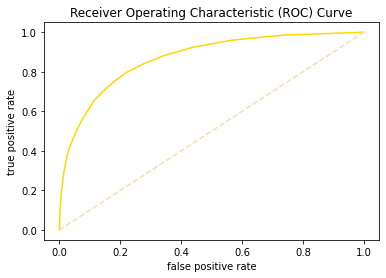

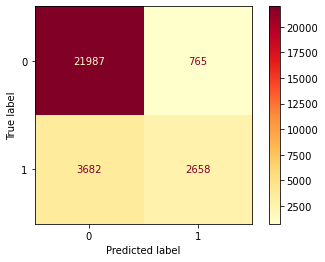

In [47]:
from sklearn.neighbors import KNeighborsClassifier

params_lr = {'n_neighbors': 26, 'n_jobs':-1}

model_knn = KNeighborsClassifier(**params_lr)

model_knn, accuracy_knn, roc_auc_knn, fone_knn, precision_knn, recall_knn, time_knn = run_model(model_knn, X_train, y_train, X_test, y_test)

### Logistische Regression <a name="logreg"></a>
Als zweiter Learner implementieren wir die logistische Regression. Genau wie beim kNN werten wir die Scores (Qualitätsmasse) aus und visualisieren die Ergebnisse TP, FP, TN, FN in einer Konfusionsmatrix.

Accuracy = 0.8481025711535818
ROC Area under Curve = 0.7193661208277318
F1-Score = 0.8368485575362024
Precision = 0.8378417231291334
Recall = 0.8481025711535818
Time taken = 0.31665921211242676
              precision    recall  f1-score   support

           0    0.86984   0.94757   0.90704     22752
           1    0.72301   0.49117   0.58495      6340

    accuracy                        0.84810     29092
   macro avg    0.79642   0.71937   0.74600     29092
weighted avg    0.83784   0.84810   0.83685     29092



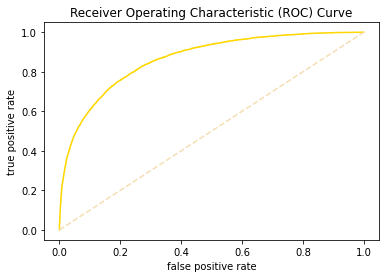

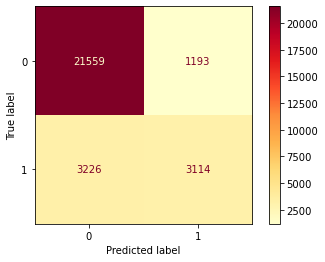

In [48]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l2', 'solver':'lbfgs'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, fone_lr, precision_lr, recall_lr, time_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Die Werte weichen nur leicht von denen des kNN ab, die Rechenzeit ist hier aber deutlich tiefer. Die ROC-Kurve verläuft nahezu identisch mit der des kNN, was eine Modellbewertung zwischen diesen beiden Learnern schwierig macht.

### Decision Trees <a name="dectree"></a>

Accuracy = 0.8195723910353362
ROC Area under Curve = 0.7011828543793565
F1-Score = 0.8124535072358451
Precision = 0.8088713755010292
Recall = 0.8195723910353362
Time taken = 0.29729151725769043
              precision    recall  f1-score   support

           0    0.86536   0.91104   0.88761     22752
           1    0.60615   0.49132   0.54273      6340

    accuracy                        0.81957     29092
   macro avg    0.73576   0.70118   0.71517     29092
weighted avg    0.80887   0.81957   0.81245     29092



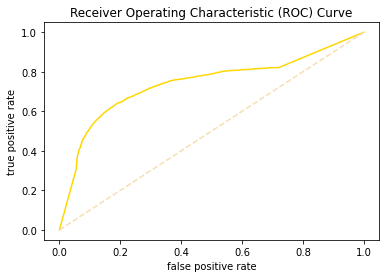

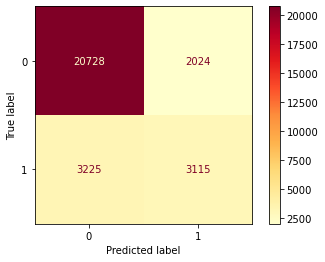

In [49]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, fone_dt, precision_dt, recall_dt, time_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Bei den Decision Trees ist die Genauigkeit leicht tiefer als bei den ersten beiden Learnern. Auch hier zeigt sich anhand der Rechenzeit den deutlich geringeren Berechnungsaufwand als beim kNN.

### Random Forest <a name="randfor"></a>

Accuracy = 0.8610958339062286
ROC Area under Curve = 0.7346134509754334
F1-Score = 0.8499370827980688
Precision = 0.8536489043537054
Recall = 0.8610958339062286
Time taken = 18.639240026474
              precision    recall  f1-score   support

           0    0.87544   0.95882   0.91523     22752
           1    0.77546   0.51041   0.61562      6340

    accuracy                        0.86110     29092
   macro avg    0.82545   0.73461   0.76543     29092
weighted avg    0.85365   0.86110   0.84994     29092



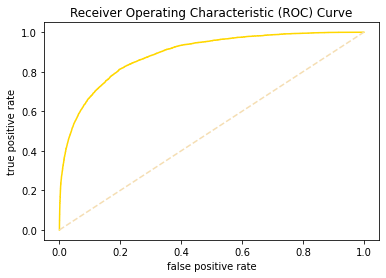

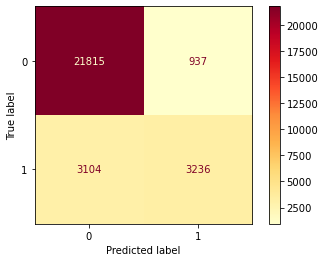

In [50]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, fone_rf, precision_rf, recall_rf, time_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Was Genauigkeit betrifft, ist der Random Forest der beste der verwendeten Learner. Wie zu erwarten war, ist die Rechenzeit höher als bei einfachen Decision Trees oder logistischer Regression, aber immernoch deutlich tiefer, als beim kNN. Aufgrund der Genauigkeit werden wir versuchen, diesen Learner zu boosten.

### Dimensionsreduktion am optimierten kNN Algorithmus<a name="dimred"></a>

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Dimensionsreduktion mit PCA
pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
explainedVariance=0.95
d = np.argmax(cumsum >= explainedVariance) + 1

print("Dimension des Unterraumes: %i" % d)

Dimension des Unterraumes: 17


In [52]:
pca = PCA(n_components=explainedVariance)
X_train_PCA = pca.fit_transform(X_train)

In [53]:
pca.n_components_

17

In [54]:
np.sum(pca.explained_variance_ratio_)

0.9521831740899325

Accuracy = 0.8220472982263165
ROC Area under Curve = 0.6490057240435341
F1-Score = 0.7982585875838469
Precision = 0.8050803646119159
Recall = 0.8220472982263165
Time taken = 84.07404732704163
              precision    recall  f1-score   support

           0    0.83909   0.95574   0.89362     22752
           1    0.68303   0.34227   0.45603      6340

    accuracy                        0.82205     29092
   macro avg    0.76106   0.64901   0.67483     29092
weighted avg    0.80508   0.82205   0.79826     29092



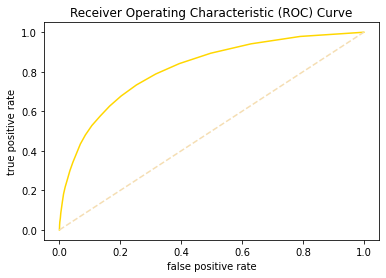

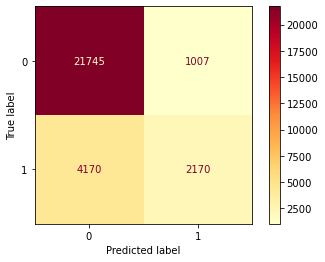

In [55]:
pca = PCA(n_components = 17)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.fit_transform(X_test)

params_lr = {'n_neighbors': 26, 'n_jobs':-1}

model_knn_pca = KNeighborsClassifier(**params_lr)

model_knn_pca, accuracy_knn_pca, roc_auc_knn_pca, fone_knn_pca, precision_knn_pca, recall_knn_pca, time_knn_pca = run_model(model_knn_pca, X_train_PCA, y_train, X_test_PCA, y_test)

Mit einer Dimensionsreduktion erhofften wir uns geringere Rechenzeiten beim kNN. Die damit verbundene Verringerung der Genauigkeit wird in Kauf genommen. Das Ergebnis zeigt aber, dass eine Optimierung in diese Richtung für unser Problem nicht infrage kommt.

***
***
## Validierung <a name="val"></a>
Kreuzvalidierte Performance dieser Lerner und Hyperparameter-Tuning

### Vergleich der Modelle

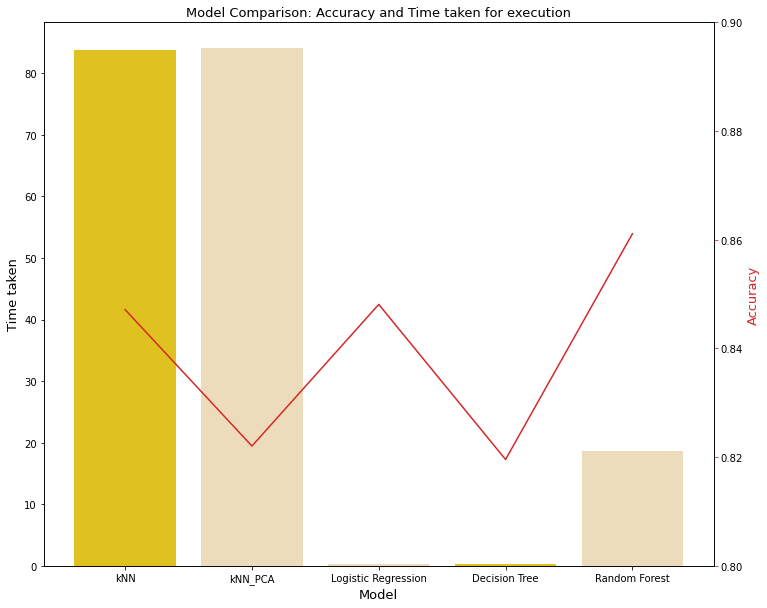

In [56]:
accuracy_scores = [accuracy_knn, accuracy_knn_pca, accuracy_lr, accuracy_dt, accuracy_rf]
roc_auc_scores = [roc_auc_knn, roc_auc_knn_pca, roc_auc_lr, roc_auc_dt, roc_auc_rf]
fone_scores = [fone_knn, fone_knn_pca, fone_lr, fone_dt, fone_rf]
tt = [time_knn, time_knn_pca, time_lr, time_dt, time_rf]

model_data = {'Model': ['kNN', 'kNN_PCA', 'Logistic Regression', 'Decision Tree', 'Random Forest'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'F1 Score': fone_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette=palette1)
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', fontsize=13, color='tab:red')
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color='tab:red')
ax2.tick_params(axis='y', color='tab:red')
ax2.set(ylim=(0.8, 0.9));

***
***
### Boosting von Random Forest <a name="boosting"></a>

Accuracy = 0.8663550116870617
ROC Area under Curve = 0.7404788763327077
F1-Score = 0.8552041925148892
Precision = 0.8602878607646162
Recall = 0.8663550116870617
Time taken = 621.21639752388
              precision    recall  f1-score   support

           0    0.87752   0.96361   0.91855     22752
           1    0.79844   0.51735   0.62787      6340

    accuracy                        0.86636     29092
   macro avg    0.83798   0.74048   0.77321     29092
weighted avg    0.86029   0.86636   0.85520     29092



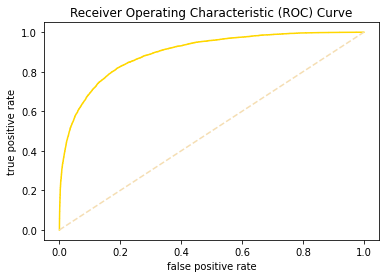

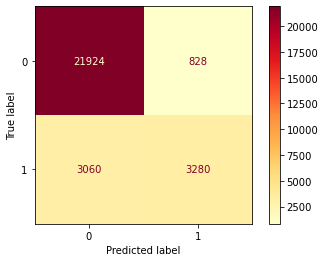

In [57]:
# Boosting des Random Forest Classifier
from sklearn.ensemble import AdaBoostClassifier

params_ada = {'base_estimator': RandomForestClassifier(**params_rf),
              'n_estimators': 500,
              'algorithm': 'SAMME.R',
              'learning_rate': 1    
             }

model_ada = AdaBoostClassifier(**params_ada)
model_ada, accuracy_ada, roc_auc_ada, fone_ada, precision_ada, recall_ada, time_ada = run_model(model_ada, X_train, y_train, X_test, y_test)

In [58]:
!pip install catboost
!pip install xgboost

Accuracy = 0.8493743984600578
ROC Area under Curve = 0.7377577095174079
F1-Score = 0.841963845371988
Precision = 0.8404305978093283
Recall = 0.8493743984600578
Time taken = 153.00309205055237
              precision    recall  f1-score   support

           0    0.87948   0.93561   0.90668     22752
           1    0.70029   0.53991   0.60973      6340

    accuracy                        0.84937     29092
   macro avg    0.78988   0.73776   0.75820     29092
weighted avg    0.84043   0.84937   0.84196     29092



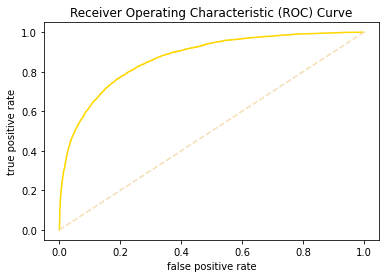

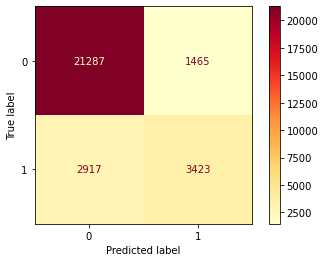

In [59]:
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb);
model_cb, accuracy_cb, roc_auc_cb, fone_cb, precision_cb, recall_cb, time_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False);

[20:57:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.8681768183693112
ROC Area under Curve = 0.7675846571674497
F1-Score = 0.8621037384858815
Precision = 0.8615743226466247
Recall = 0.8681768183693112
Time taken = 73.17169570922852
              precision    recall  f1-score   support

           0    0.89206   0.94589   0.91819     22752
           1    0.75216   0.58927   0.66083      6340

    accuracy                        0.86818     29092
   macro avg    0.82211   0.76758   0.78951     29092
weighted avg    0.86157   0.86818   0.86210     29092



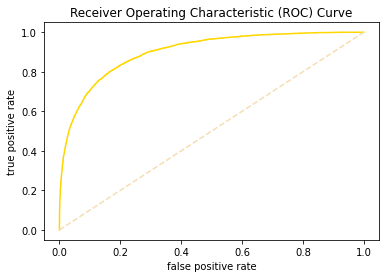

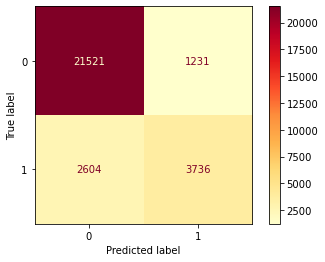

In [60]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
             'max_depth': 16,
             'use_label_encoder': False}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, fone_xgb, precision_xgb, recall_xgb, time_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

### Vergleich der Modelle

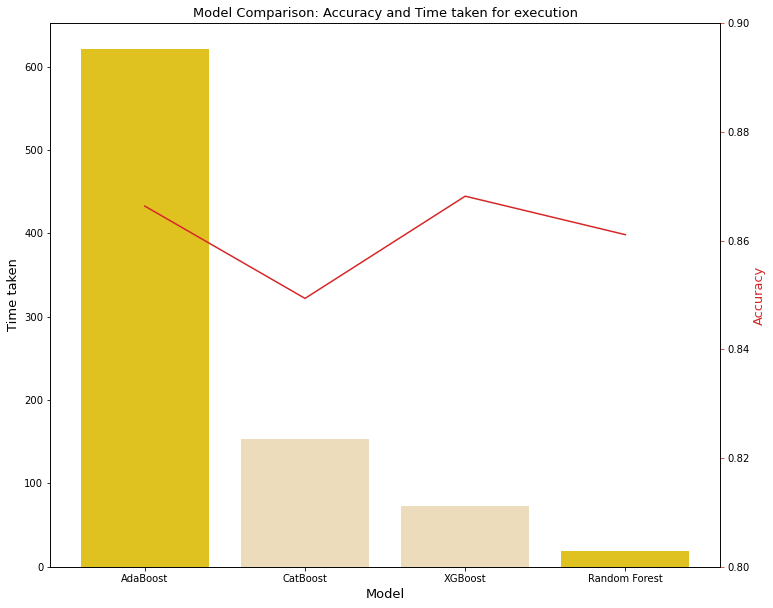

In [61]:
accuracy_scores = [accuracy_ada, accuracy_cb, accuracy_xgb, accuracy_rf]
roc_auc_scores = [roc_auc_ada, roc_auc_cb, roc_auc_xgb, roc_auc_rf]
fone_scores = [fone_ada, fone_cb, fone_xgb, fone_rf]
tt = [time_ada, time_cb, time_xgb, time_rf]

model_data = {'Model': ['AdaBoost', 'CatBoost', 'XGBoost', 'Random Forest'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'F1 Score': fone_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette=palette1)
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', fontsize=13, color='tab:red')
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color='tab:red')
ax2.tick_params(axis='y', color='tab:red')
ax2.set(ylim=(0.8, 0.9));

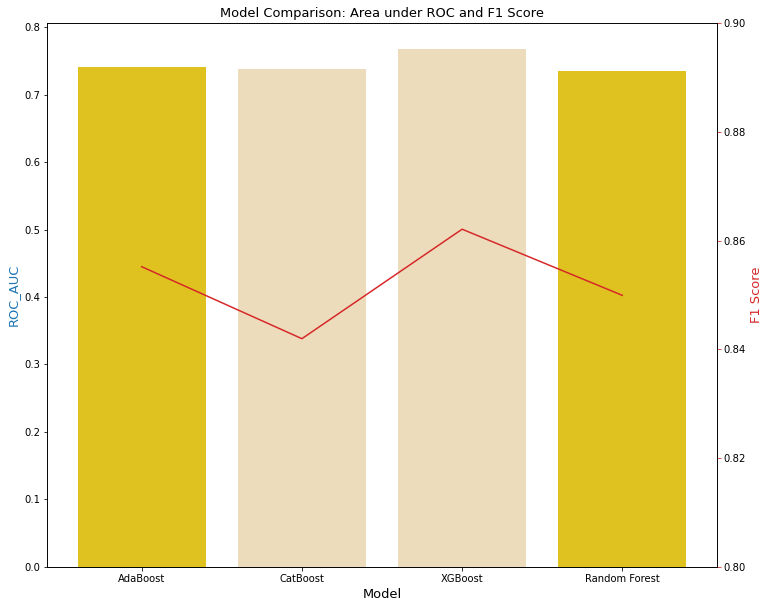

In [62]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and F1 Score', fontsize=13)
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC area under curve', fontsize=13, color='tab:blue')
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette=palette1)
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
ax4.set_ylabel('F1 Score', fontsize=13, color='tab:red')
ax4 = sns.lineplot(x='Model', y='F1 Score', data = data, sort=False, color='tab:red')
ax4.tick_params(axis='y', color='tab:red')
ax4.set(ylim=(0.8, 0.9));
plt.show()

***
***
## Entscheid <a name="entscheid"></a>
Von allen Learnern hat der Random Forest am besten abgeschlossen. Wir haben diesen Learner mit drei verschiedenen Boostern optimiert. Sowie bei Rechenzeit und Genauigkeit, als auch bei F1-Score und ROC-AUC hat sich der XGBoost als der beste herausgestellt.

***
***
## Schlussfolgerung und Ausblick <a name="ausblick"></a>
Spannend wäre zu beobachten, wie sich die Ergebnisse verändern, wenn die Data Preparation anders gemacht wird. Beispielsweise könnten fehlende Daten nicht einfach durch den Median ersetzt werden, sondern könnten aus anderen Datensätzen Werte entnommen werden, die für unseren Datensatz zutreffen. Es müsste dann auch untersucht werden, ob der Random Forest sich immernoch als der ideale Learner beweisen kann. Auf genauere Data Preparation könnten auch genauere Ergebnisse folgen. Bestehende Learner können alle noch optimiert werden. Sind die Grenzen des maschinellen Lernens erreicht, so muss auf neuronale Netzwerke zurückgegriffen werden.

***
***
## Referenzen <a name="ref"></a>
['Rain in Australia' Datensatz](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)<br>
[Erkärung der Merkmale](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml)

***
***
[Zum Inhaltsverzeichnis](#toc)